In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
%matplotlib inline
%config InlineBackend.figure_fornat = 'retina'

In [45]:
dataset = np.load("baseline_removed_dataset.npz")
X_train = dataset['X_train']
X_test = dataset['X_test']
y_train = dataset['y_train']
y_test = dataset['y_test']

In [3]:
data = np.load('baseline_removed_dataset.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

X_train
[[0.02516078 0.0291113  0.03962368 ... 0.1909087  0.24833208 0.20219984]
 [0.02228078 0.03098716 0.04280481 ... 0.14606117 0.15229071 0.16094307]
 [0.04567571 0.058949   0.06540459 ... 0.08748054 0.09990503 0.08892282]
 ...
 [0.11788363 0.12172289 0.12980589 ... 0.03470476 0.0419501  0.07861008]
 [0.02002355 0.02430378 0.03378741 ... 0.2639444  0.23560325 0.24096517]
 [0.04722712 0.05783306 0.07295318 ... 0.12300704 0.08505925 0.12513878]]
X_test
[[0.11876426 0.11850205 0.12580706 ... 0.07658365 0.04804416 0.02017156]
 [0.10565211 0.11349007 0.12533952 ... 0.1472114  0.14875892 0.12005012]
 [0.03147449 0.04646618 0.05243452 ... 0.14188262 0.11841774 0.15069667]
 ...
 [0.10075    0.10862523 0.11761261 ... 0.15885802 0.17371226 0.13531476]
 [0.00056069 0.01278786 0.02985211 ... 0.13011172 0.13449703 0.18113707]
 [0.00885059 0.02279874 0.03346979 ... 0.27044445 0.26964515 0.22069999]]
y_train
[[0.34994327 0.30077568 0.34928106]
 [0.89966443 0.         0.10033557]
 [0.19966945 0.59

In [3]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 540) (80, 540) (320, 3) (80, 3)


In [47]:
X = np.concatenate((X_train,X_test),axis=0)

In [20]:
y = np.concatenate((y_train,y_test),axis=0)

In [48]:
print(X.shape,y.shape)

(400, 540) (400, 3)


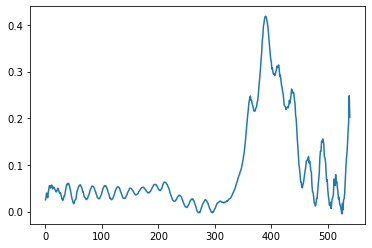

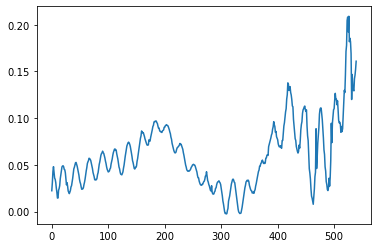

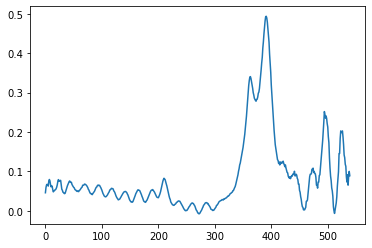

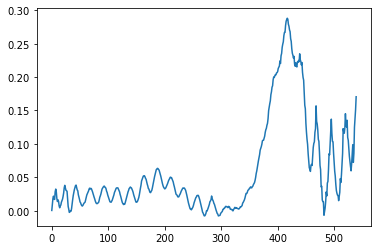

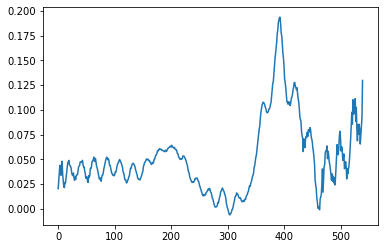

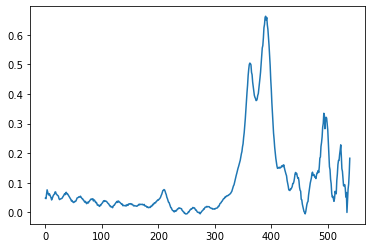

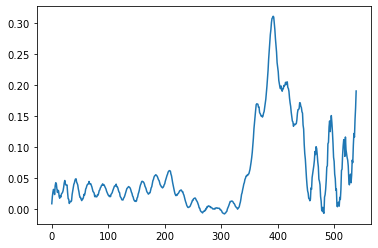

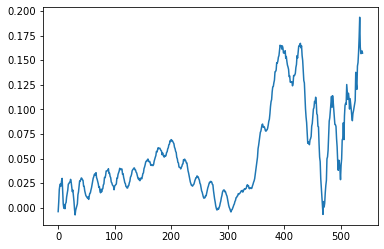

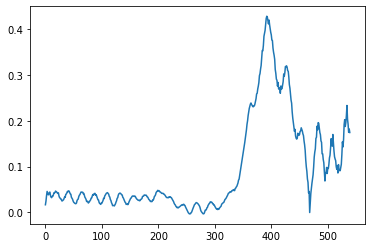

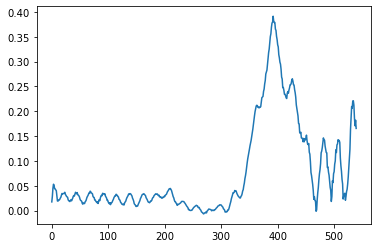

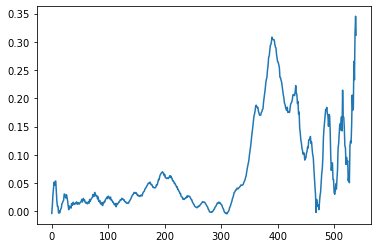

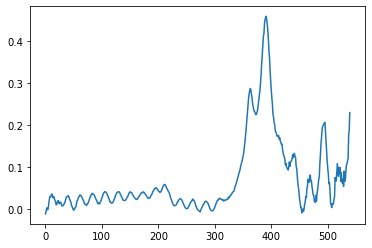

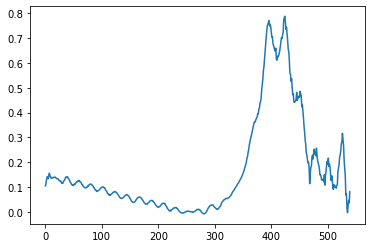

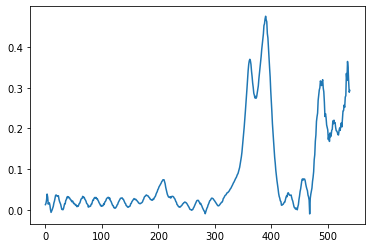

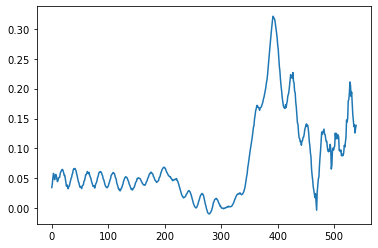

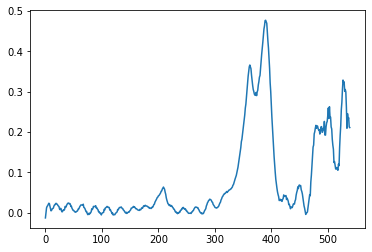

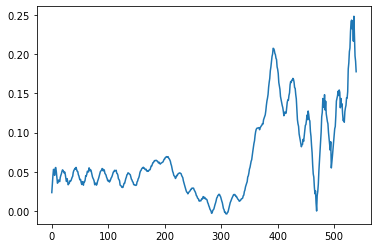

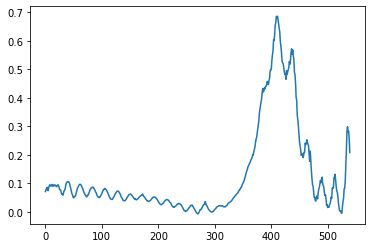

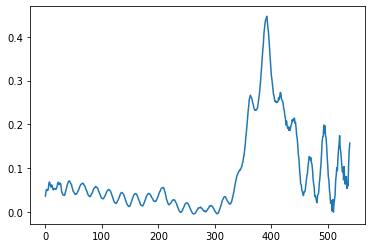

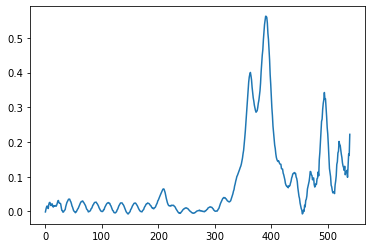

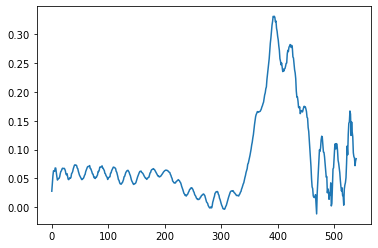

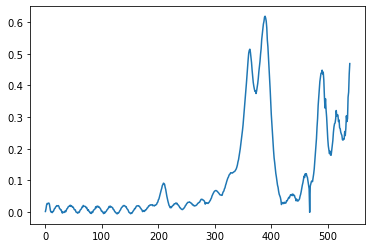

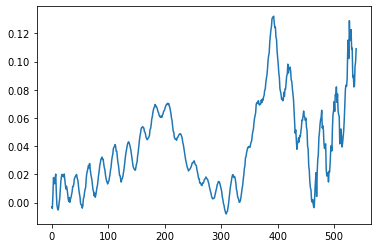

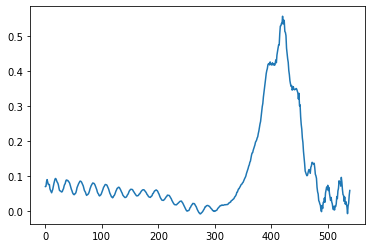

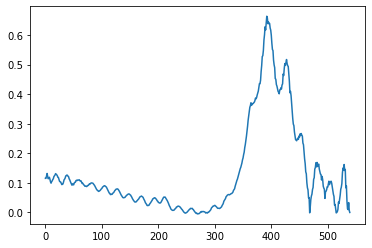

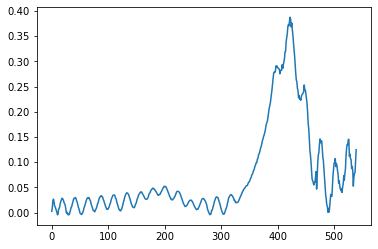

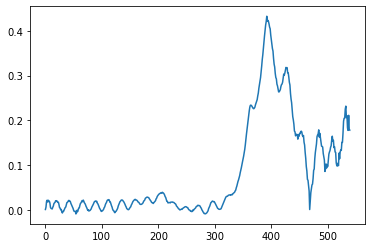

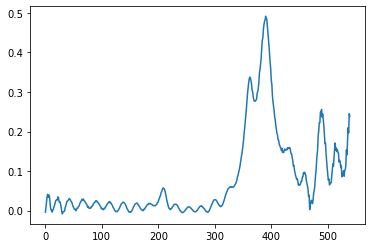

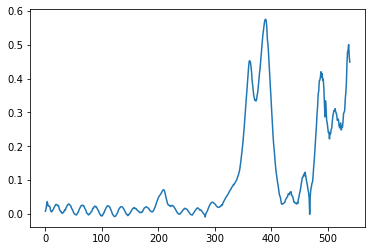

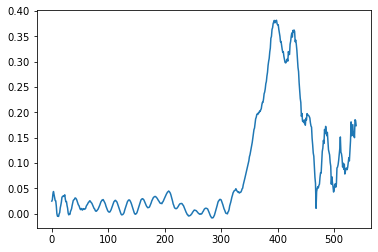

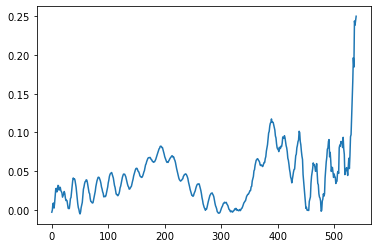

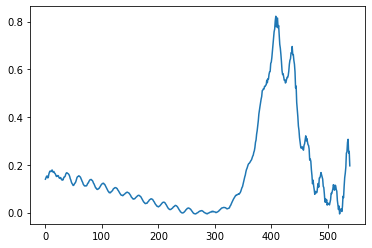

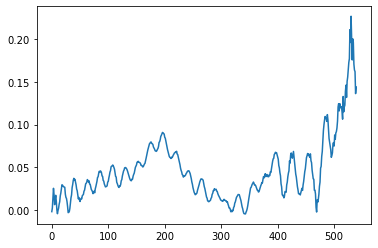

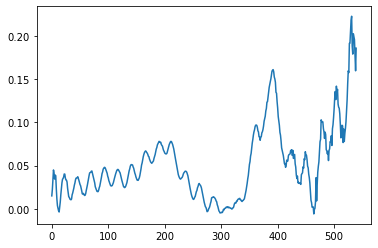

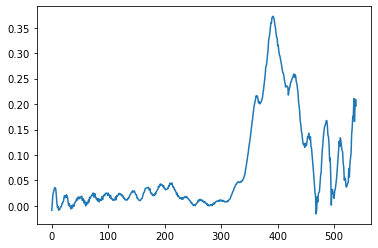

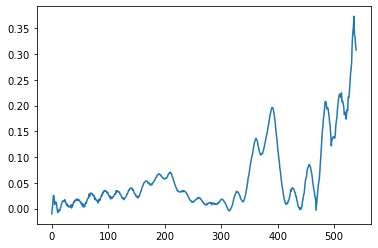

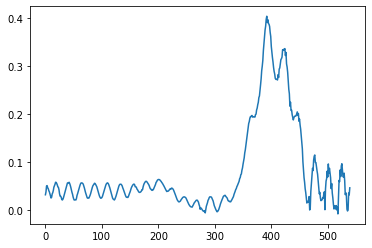

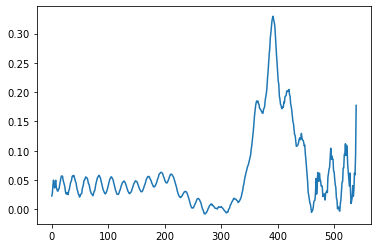

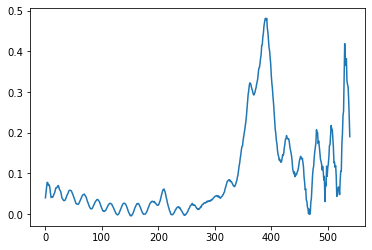

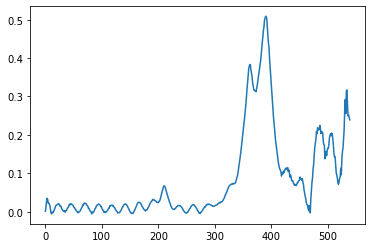

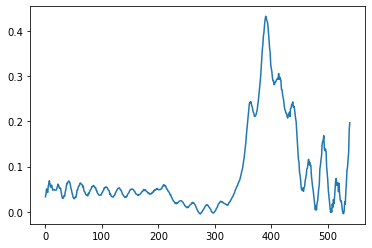

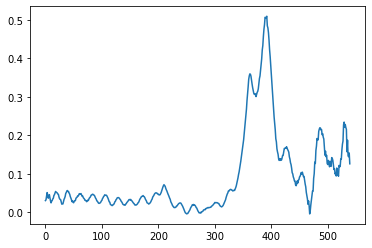

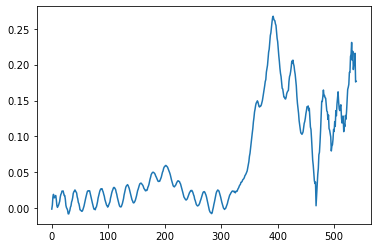

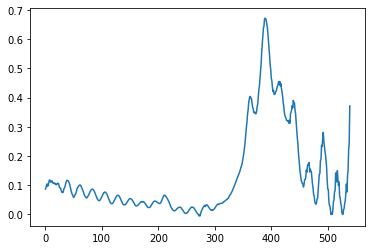

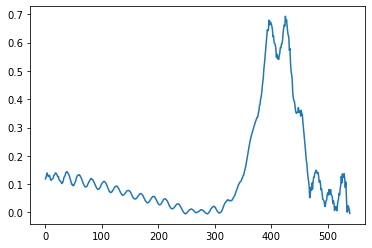

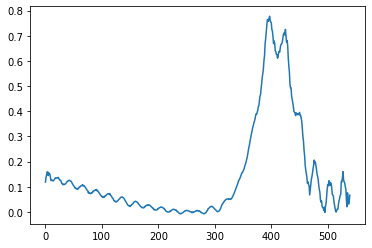

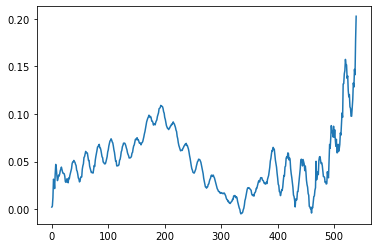

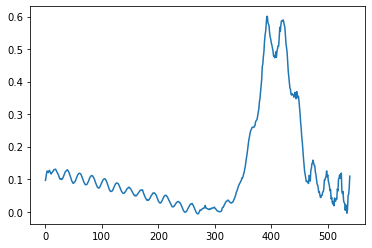

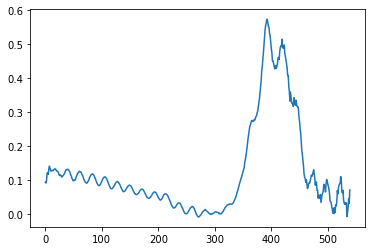

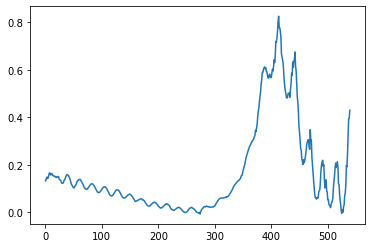

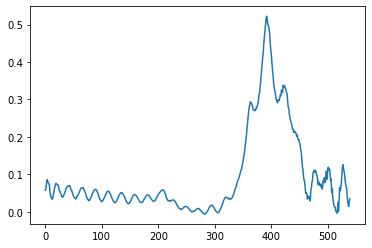

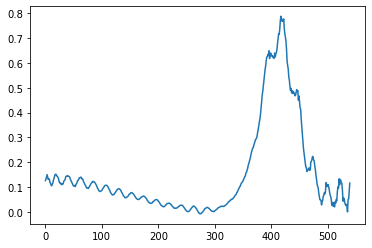

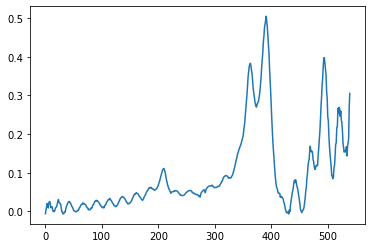

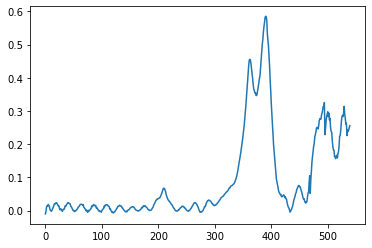

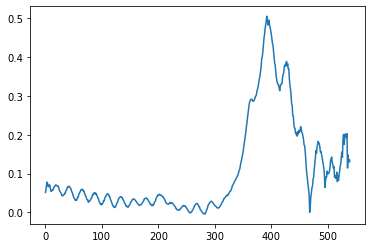

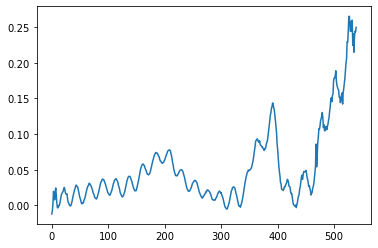

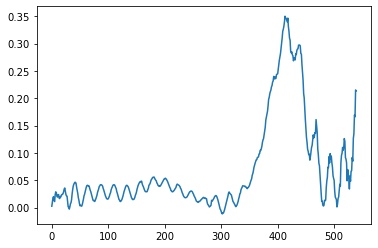

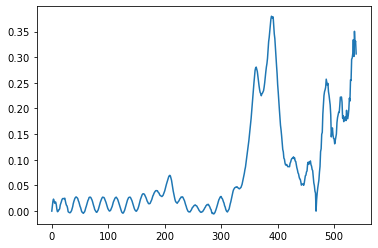

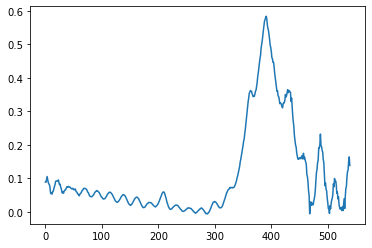

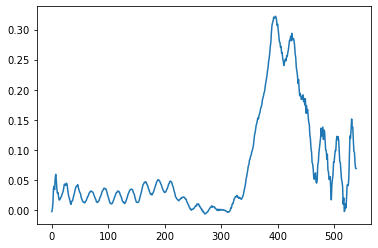

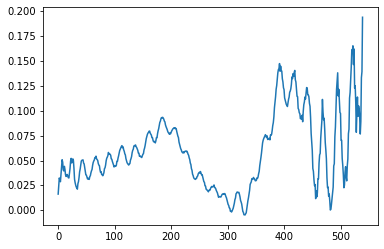

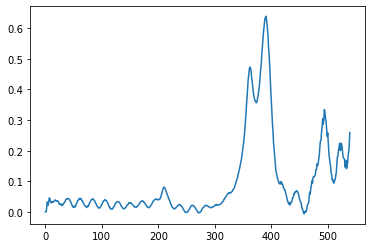

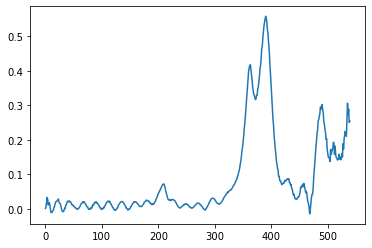

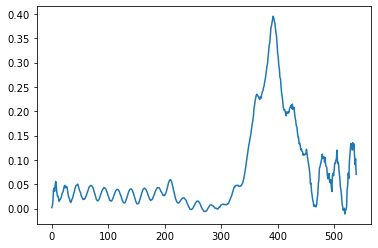

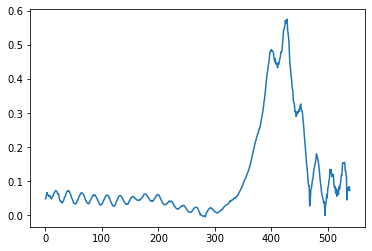

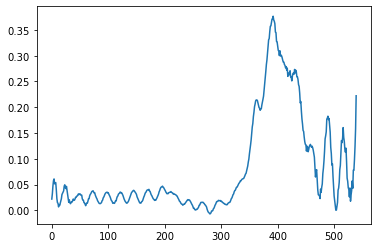

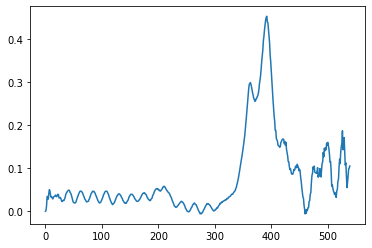

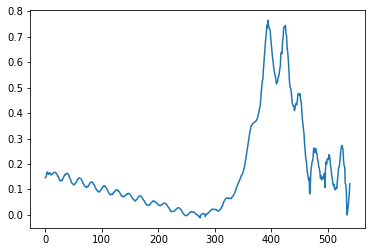

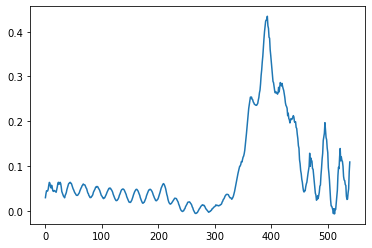

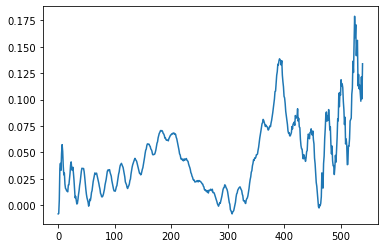

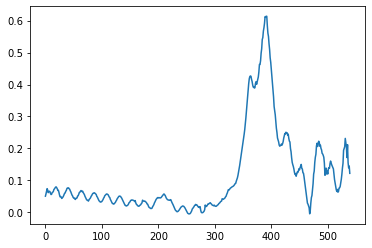

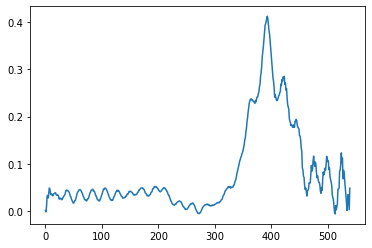

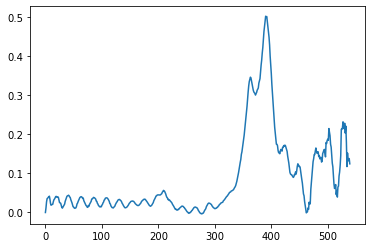

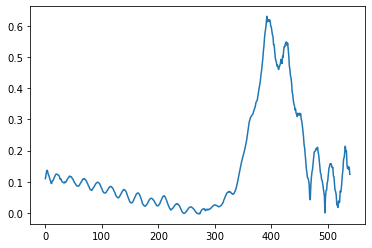

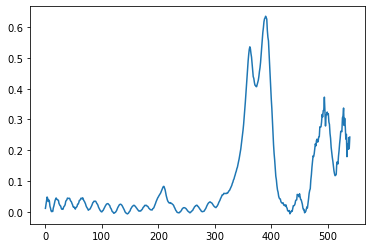

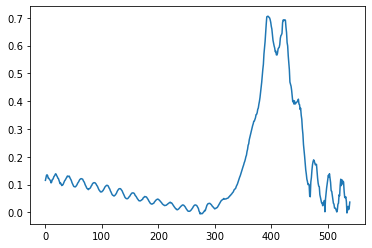

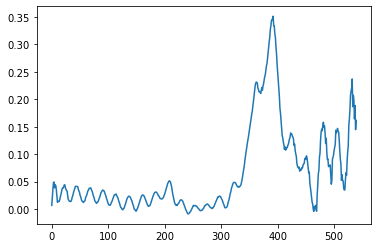

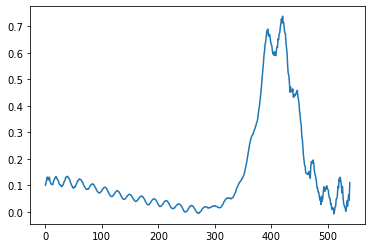

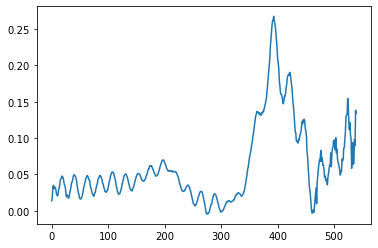

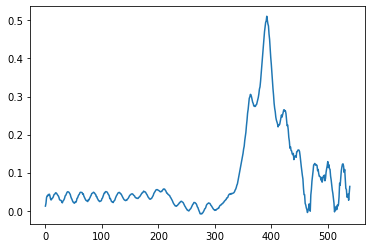

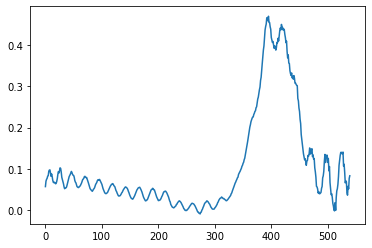

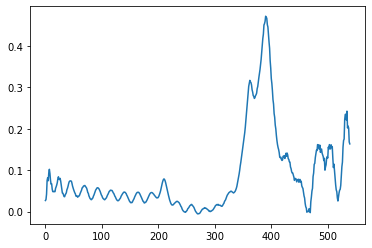

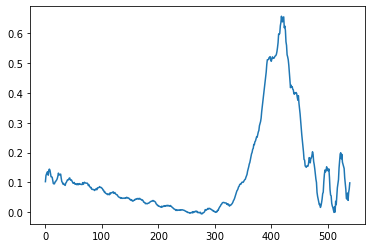

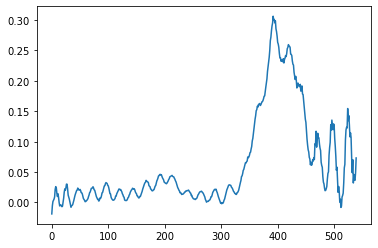

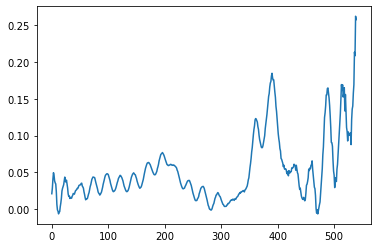

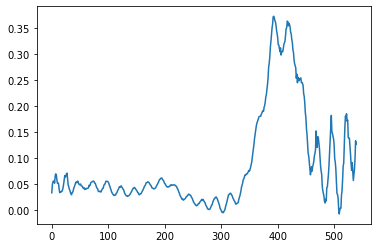

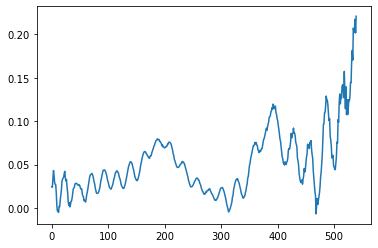

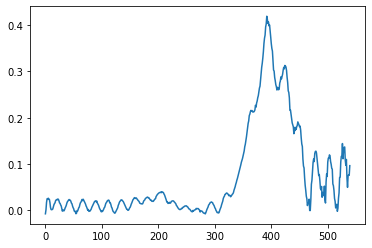

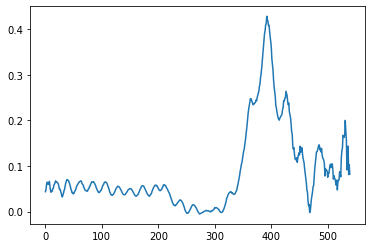

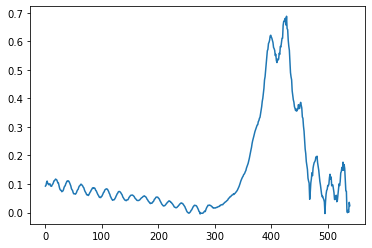

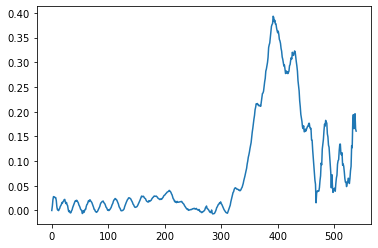

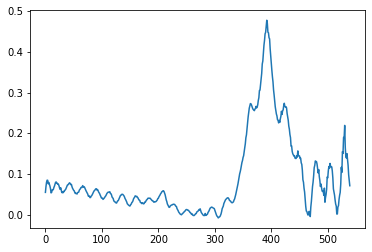

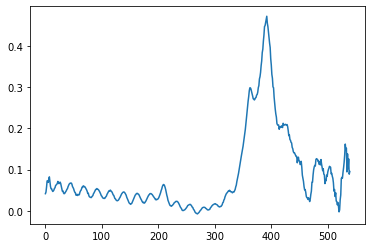

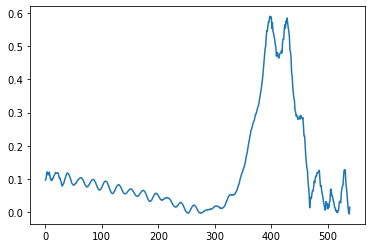

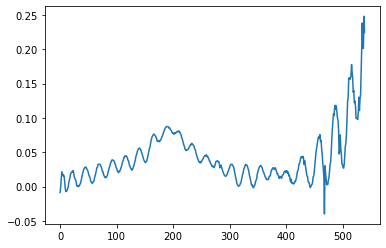

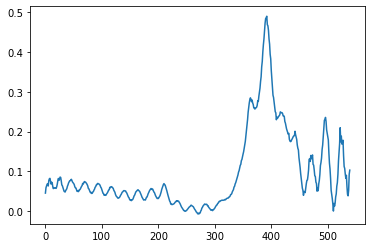

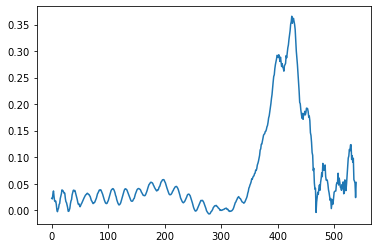

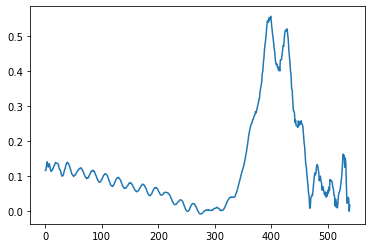

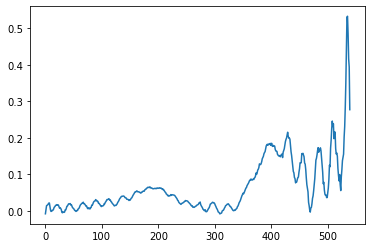

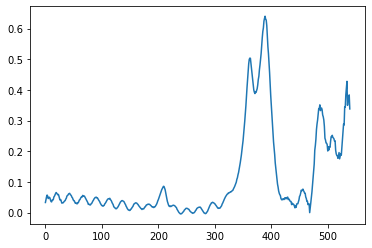

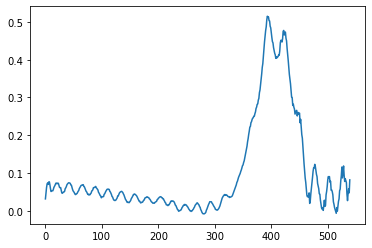

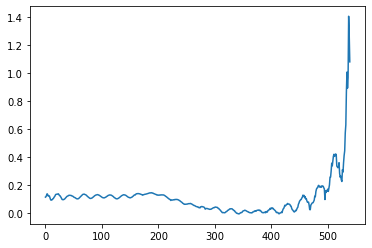

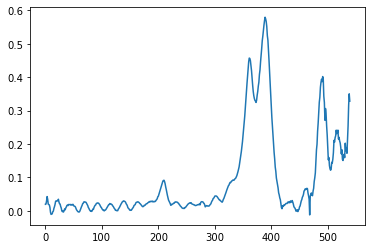

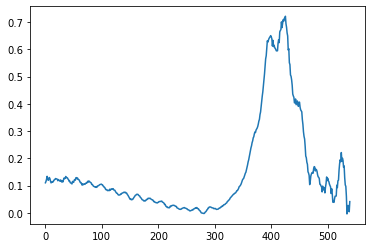

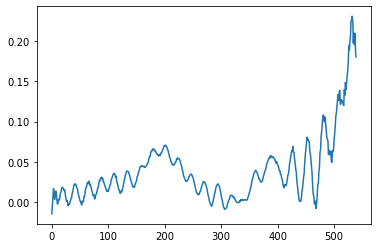

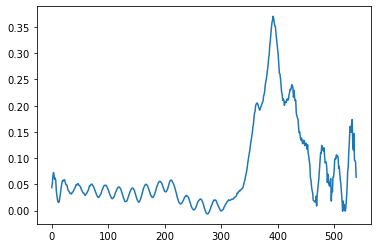

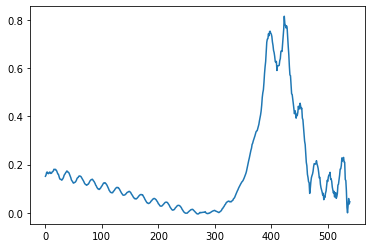

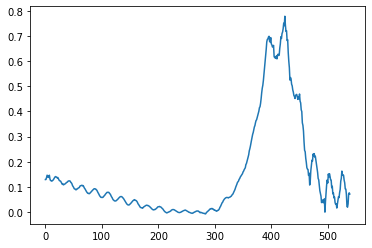

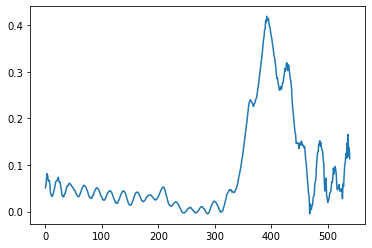

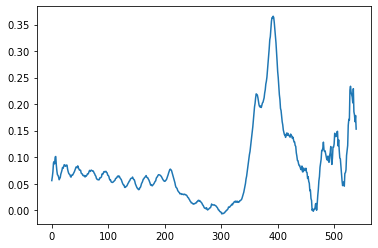

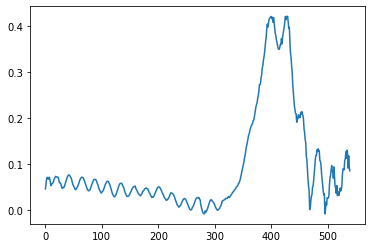

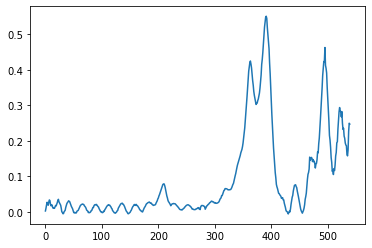

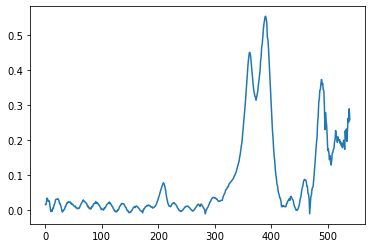

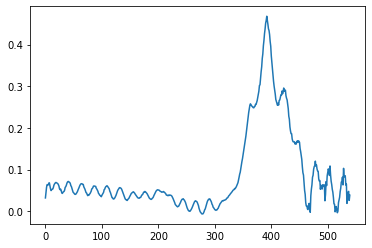

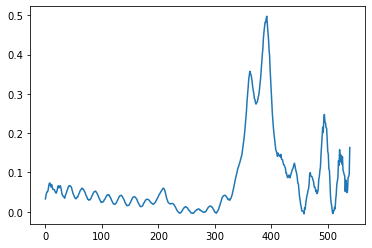

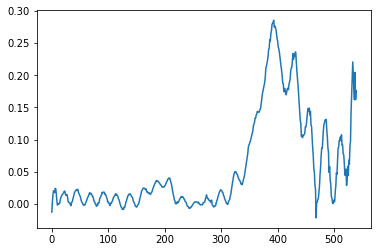

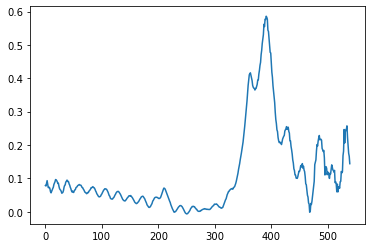

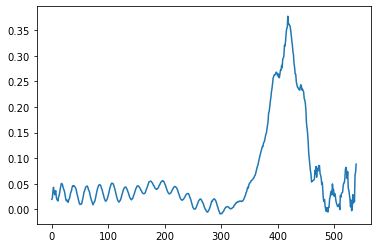

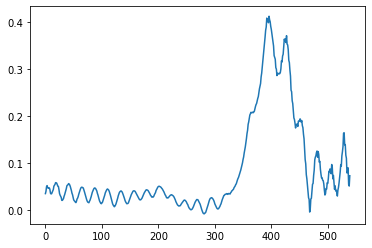

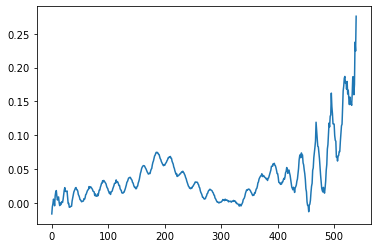

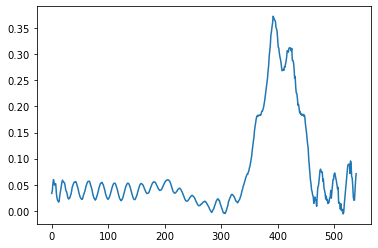

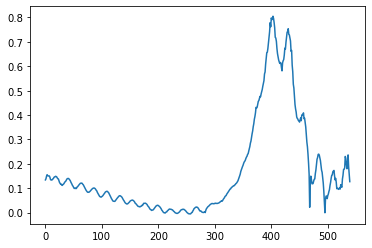

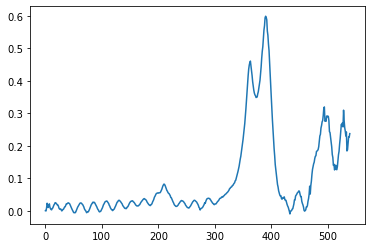

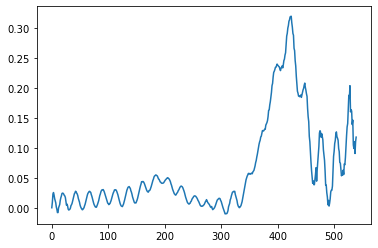

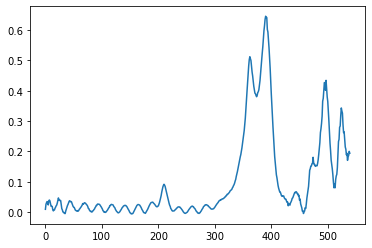

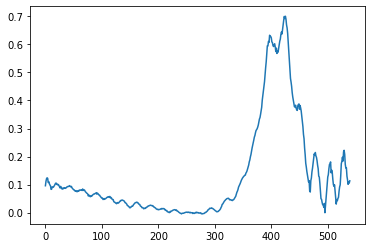

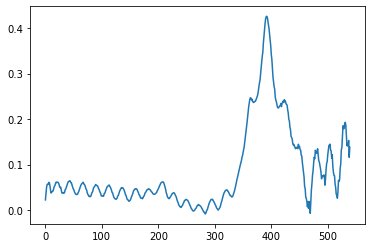

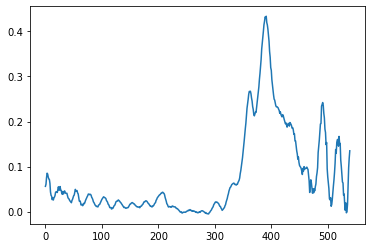

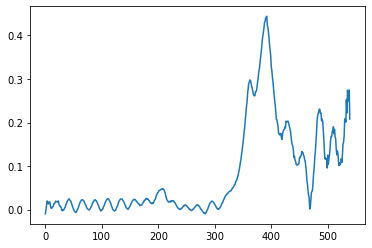

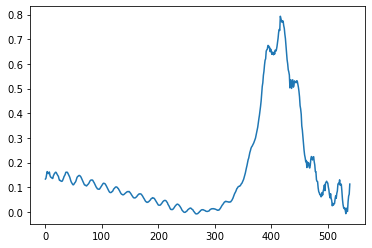

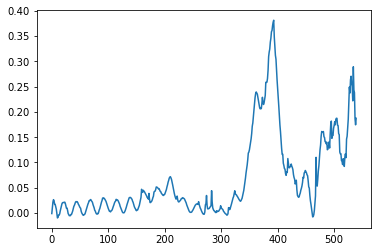

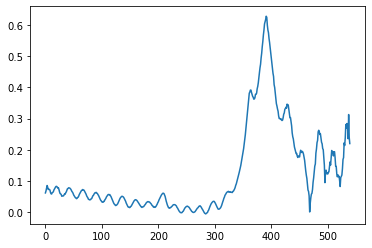

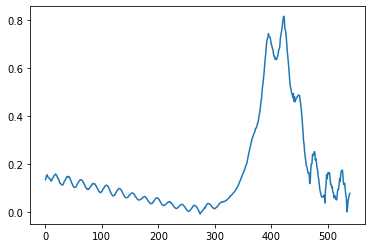

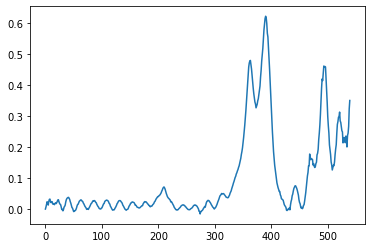

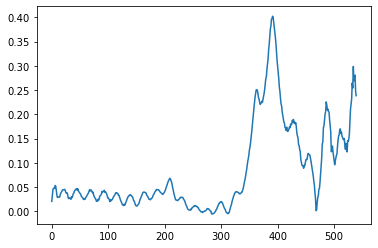

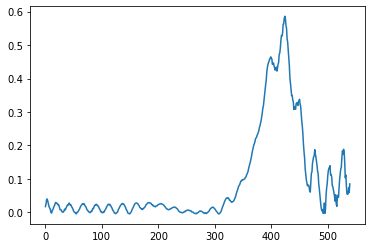

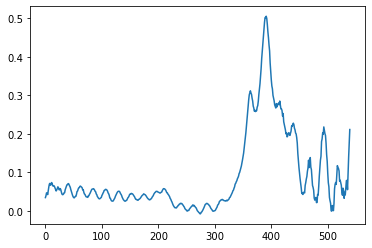

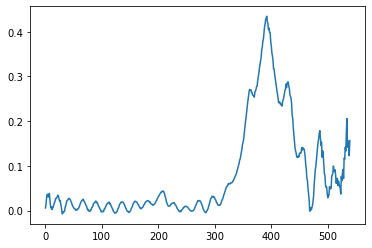

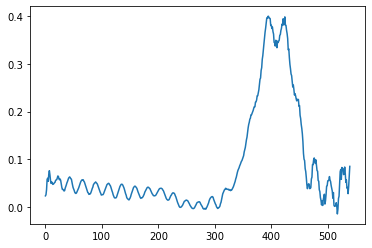

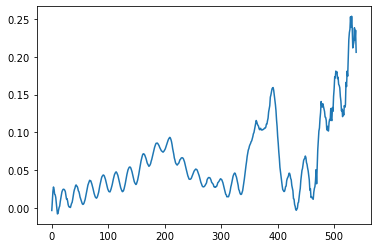

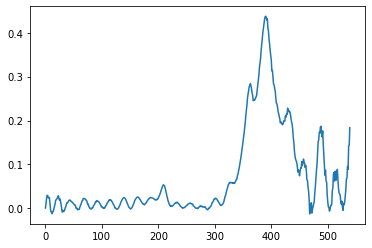

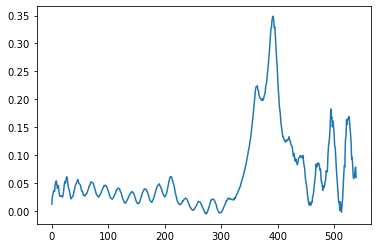

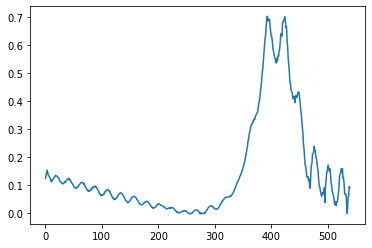

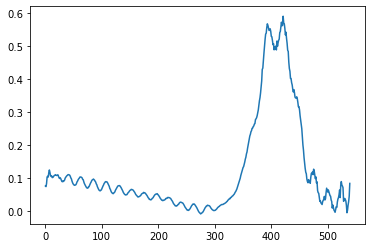

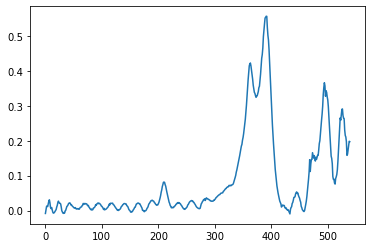

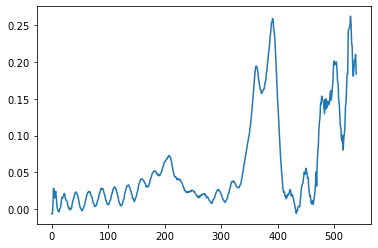

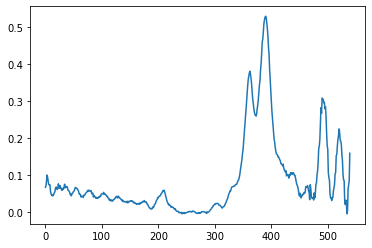

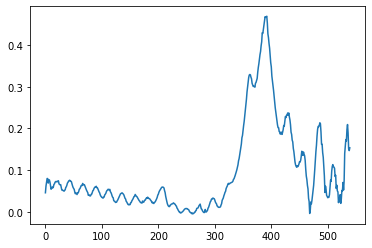

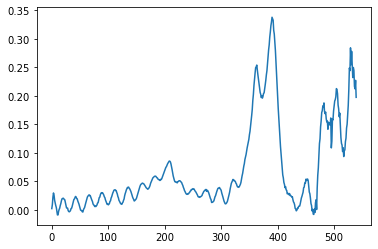

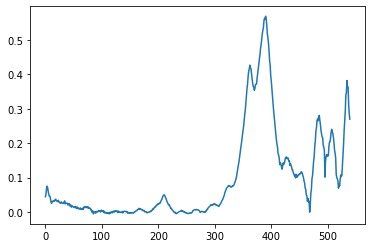

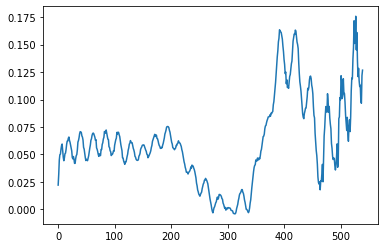

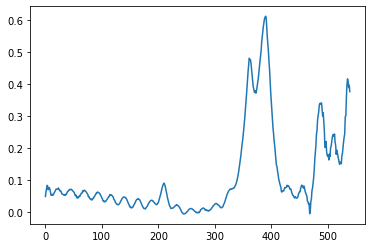

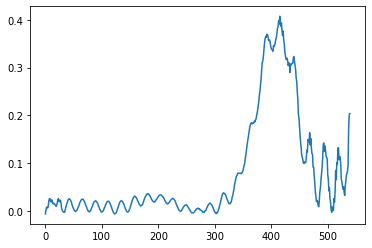

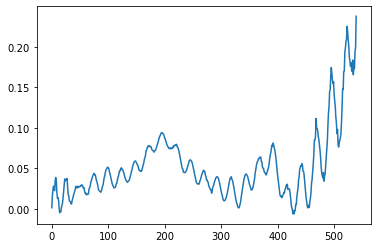

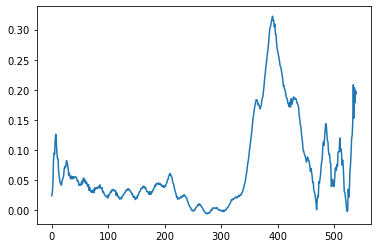

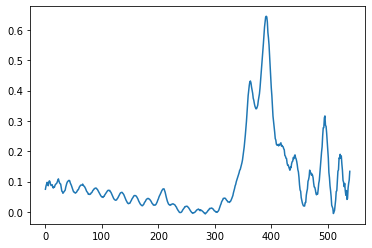

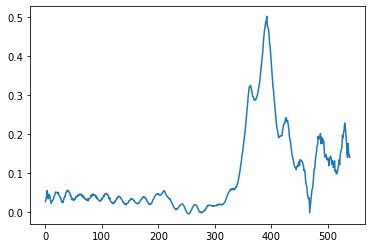

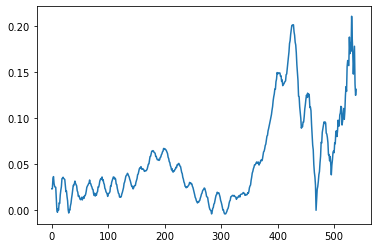

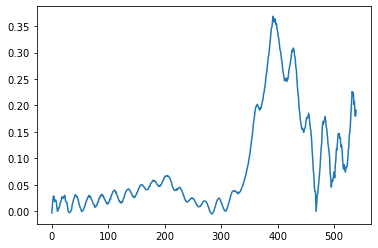

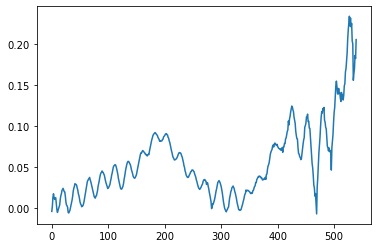

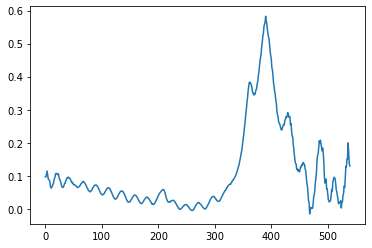

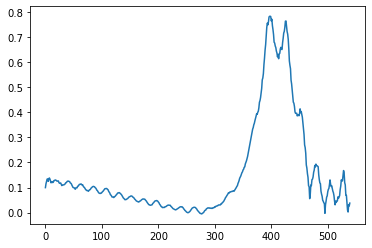

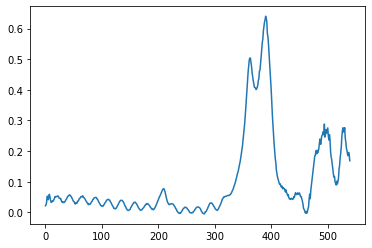

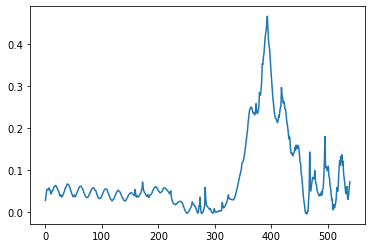

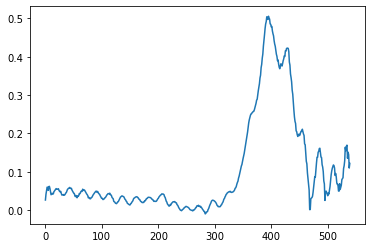

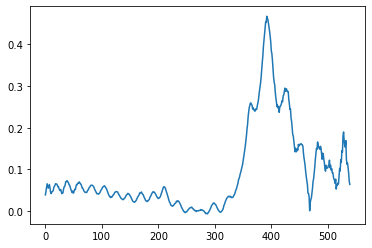

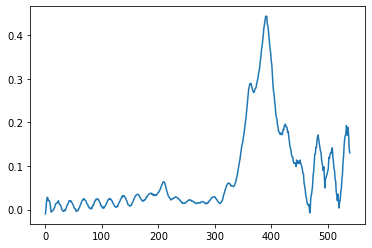

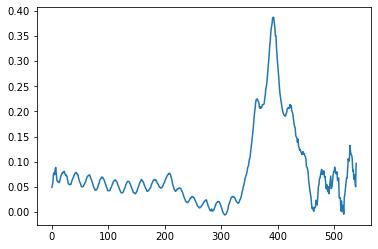

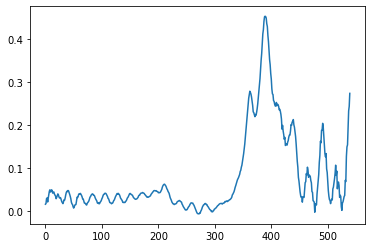

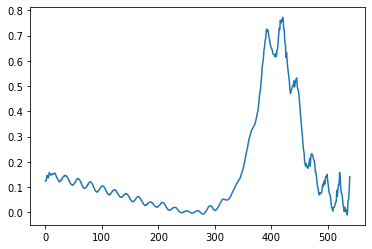

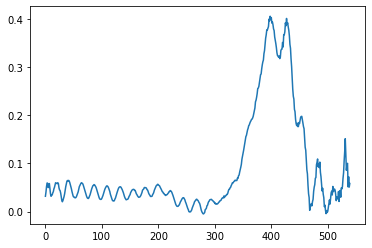

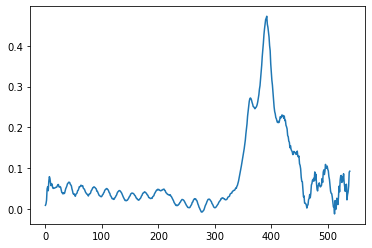

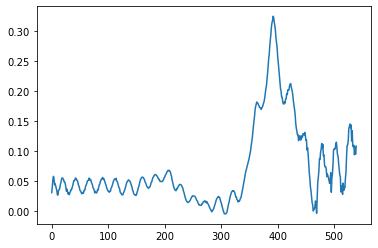

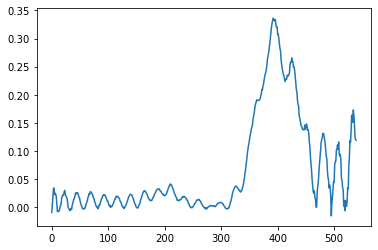

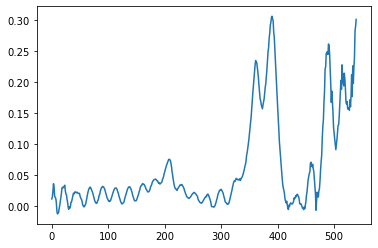

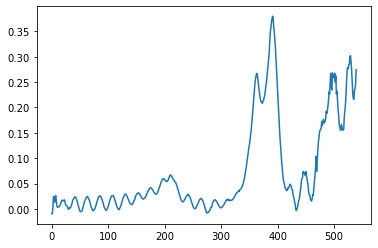

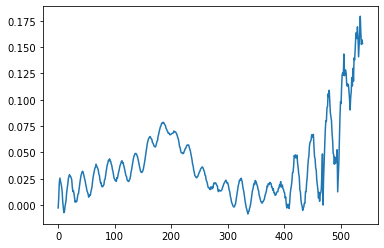

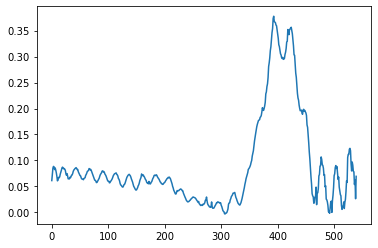

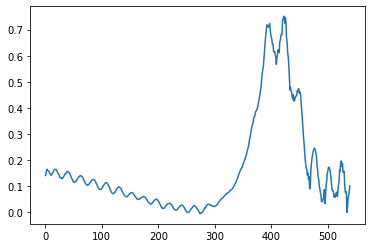

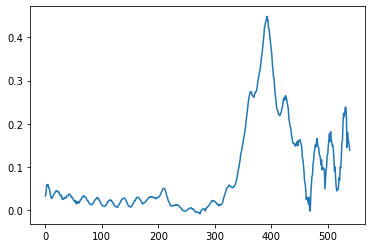

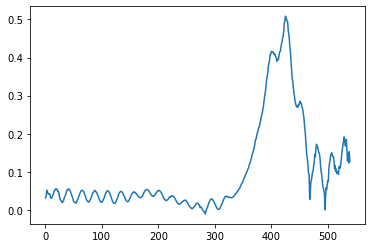

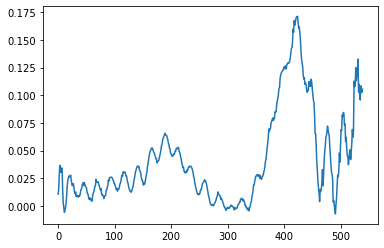

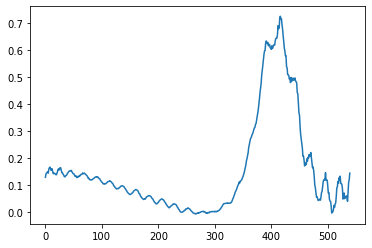

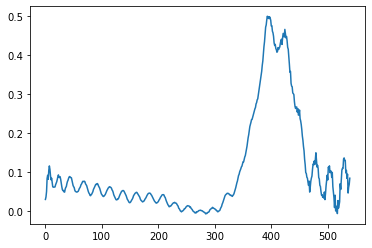

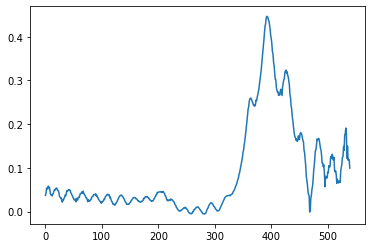

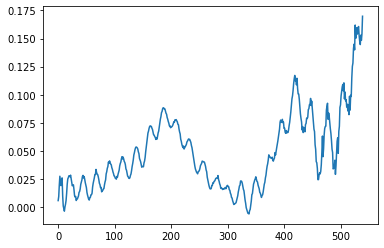

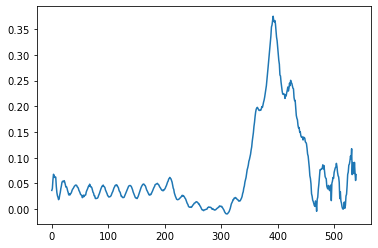

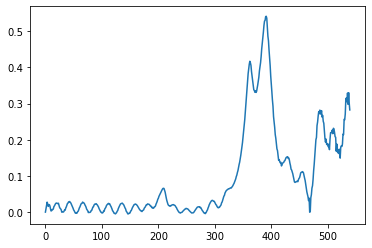

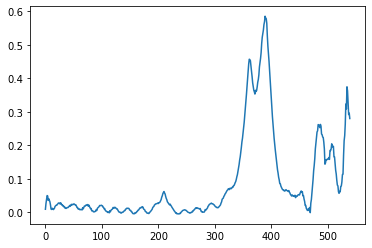

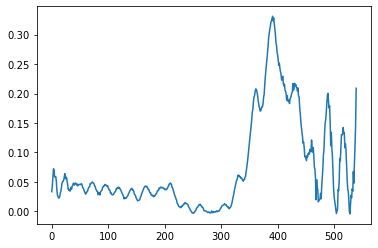

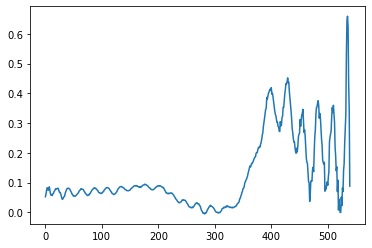

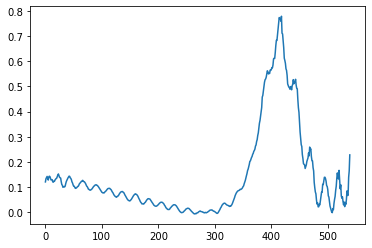

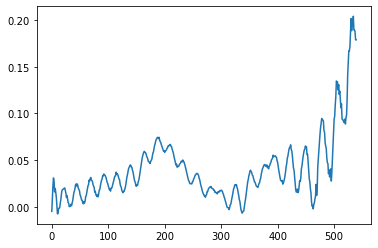

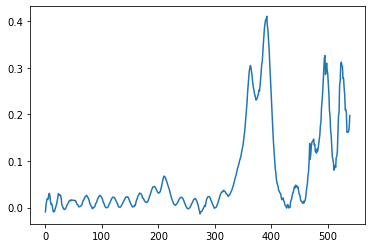

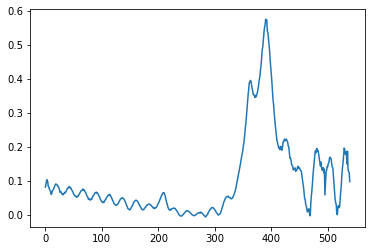

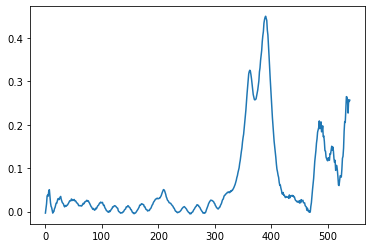

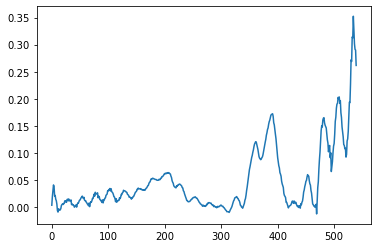

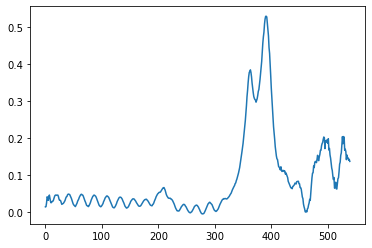

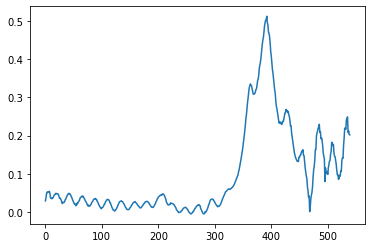

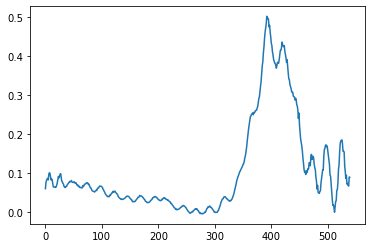

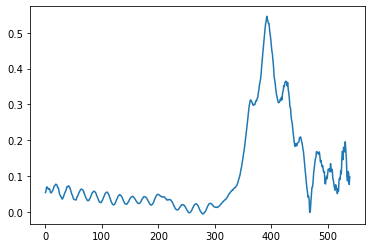

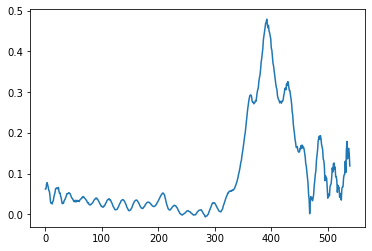

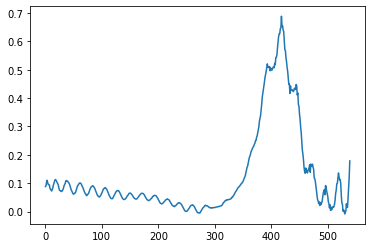

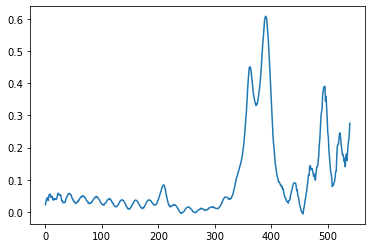

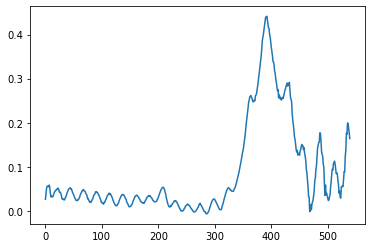

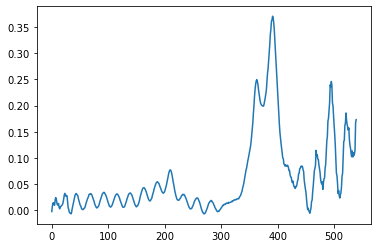

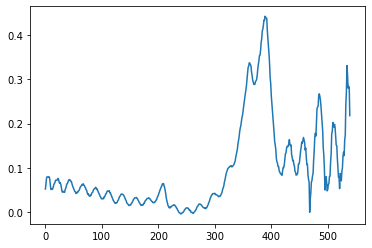

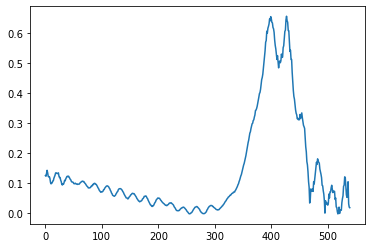

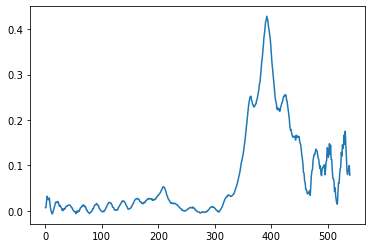

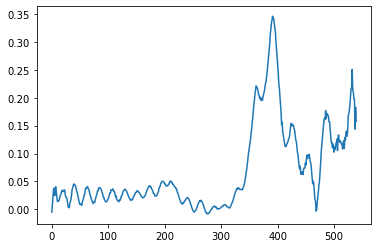

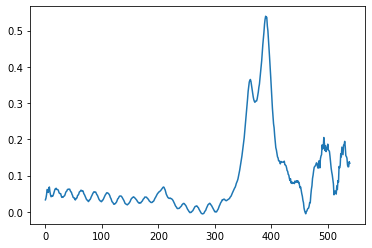

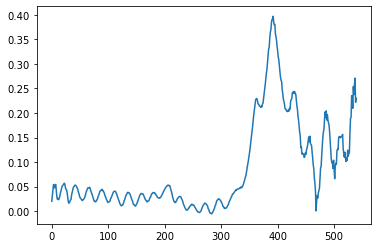

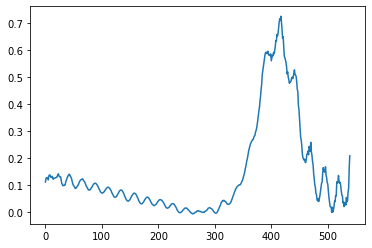

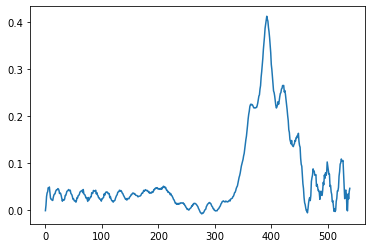

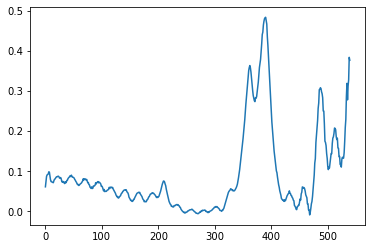

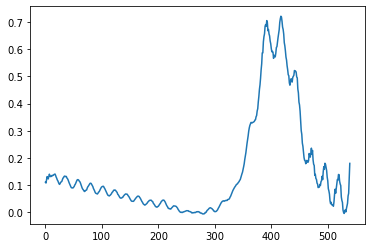

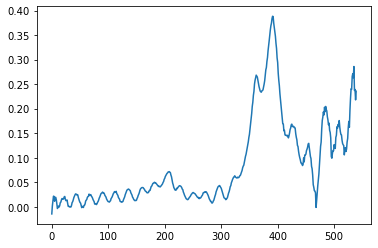

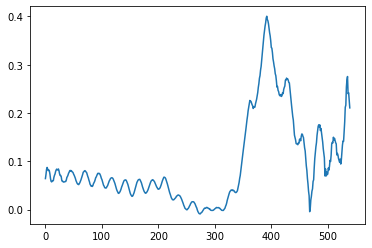

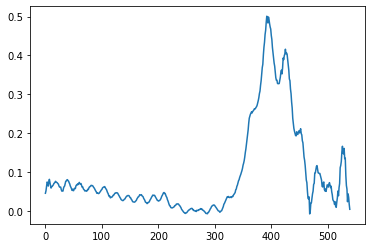

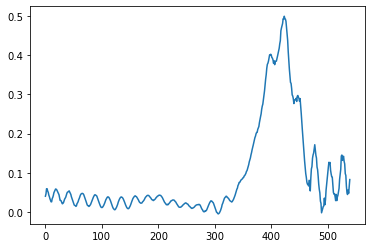

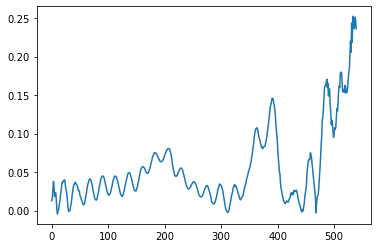

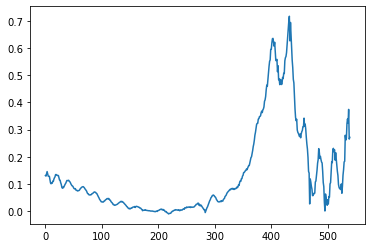

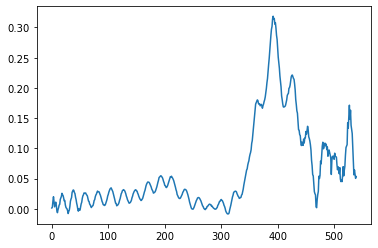

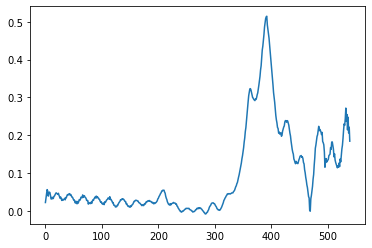

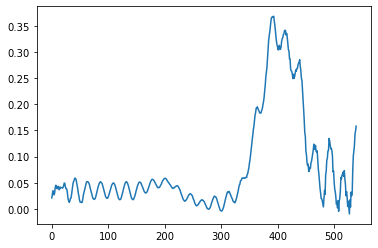

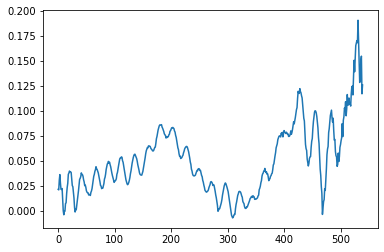

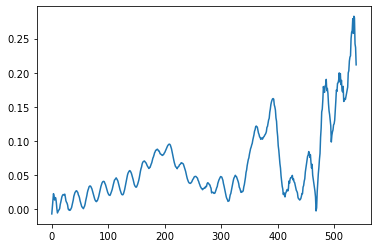

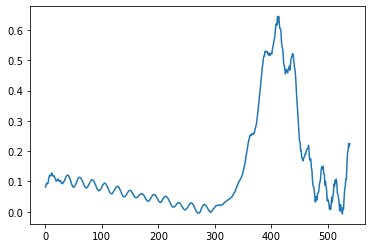

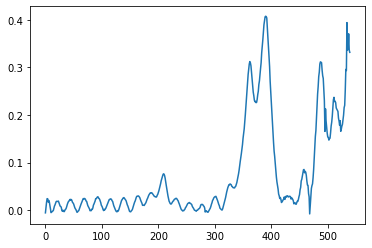

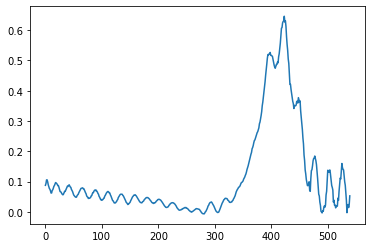

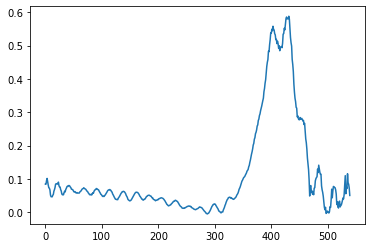

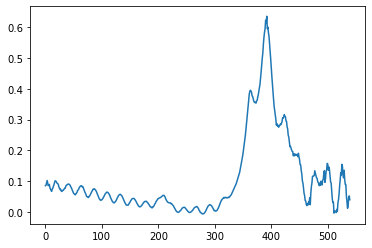

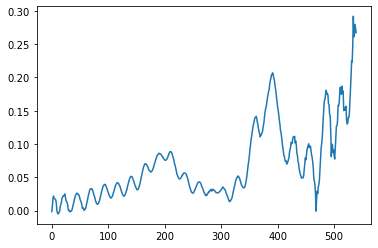

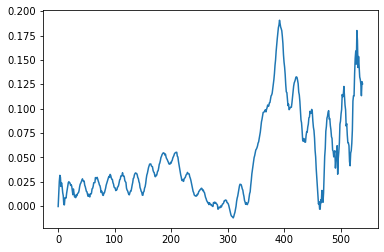

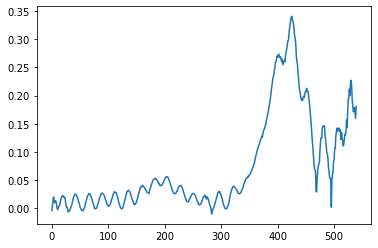

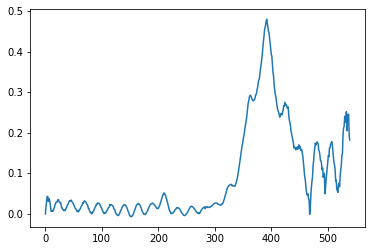

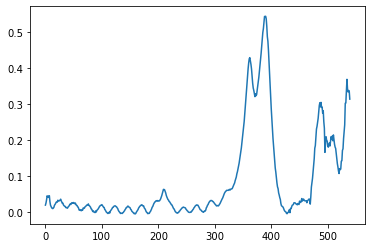

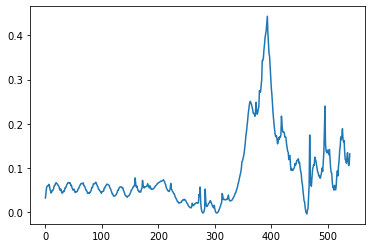

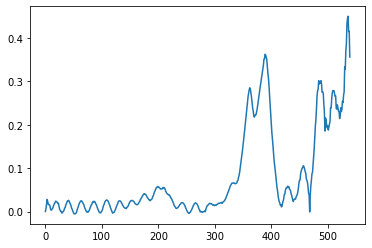

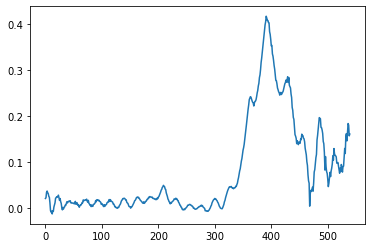

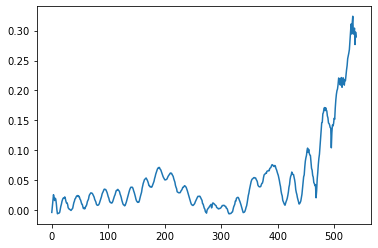

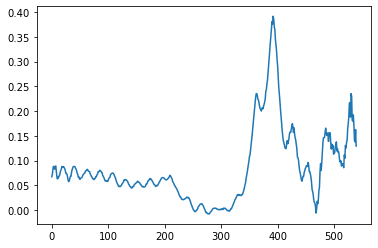

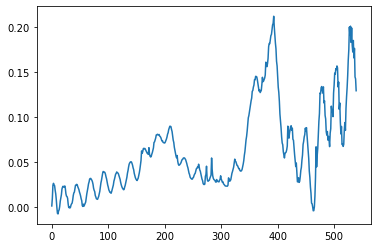

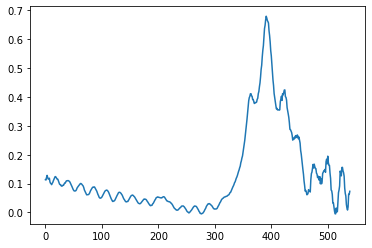

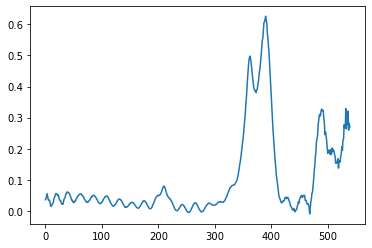

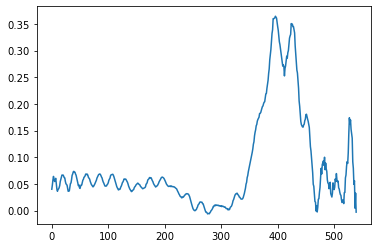

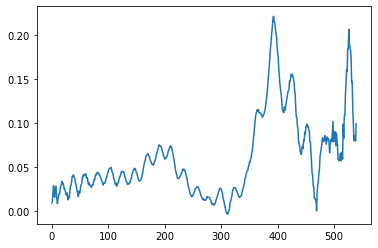

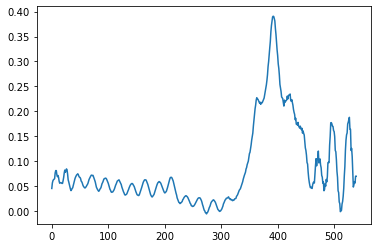

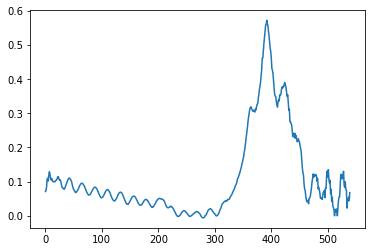

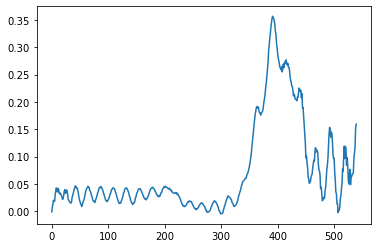

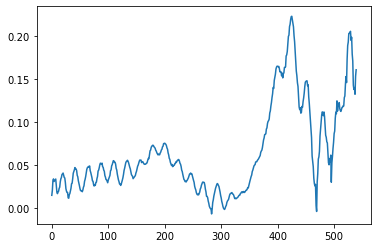

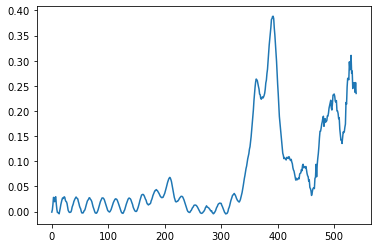

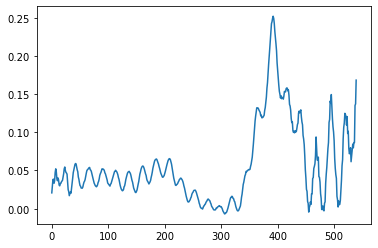

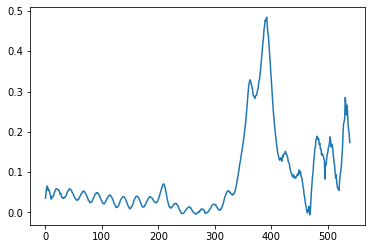

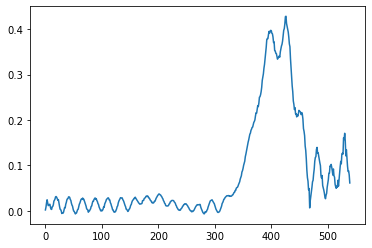

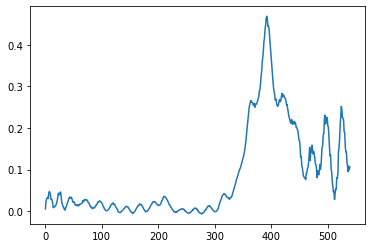

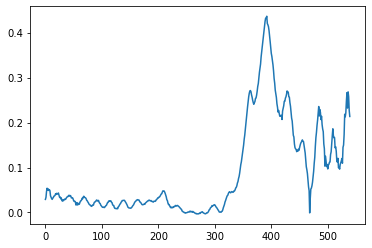

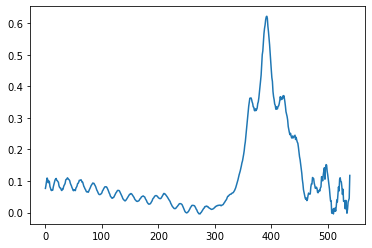

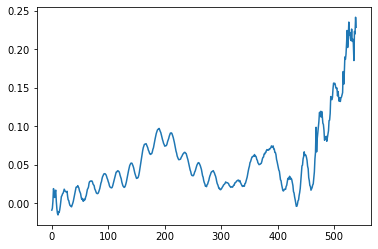

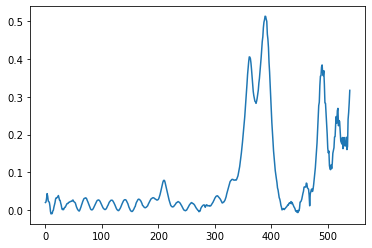

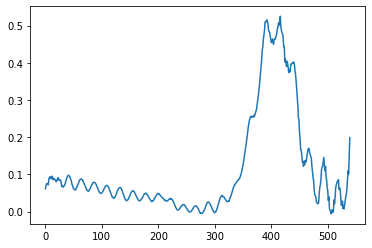

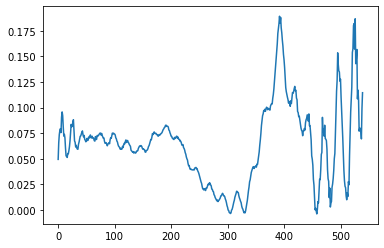

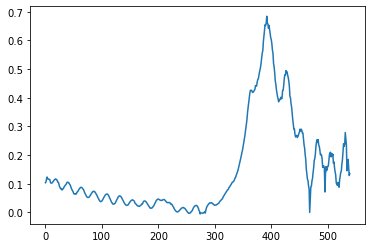

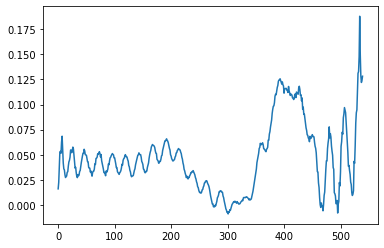

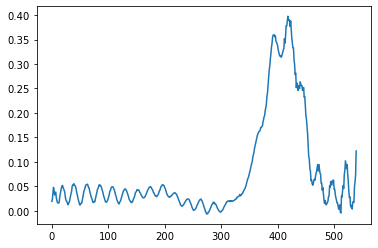

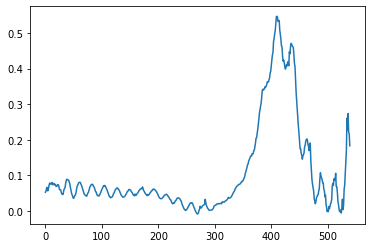

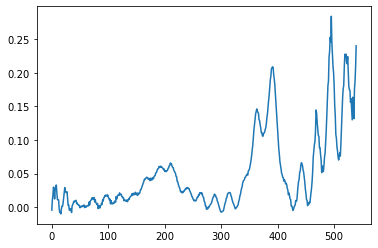

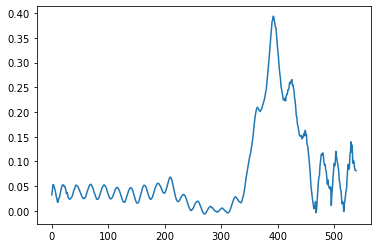

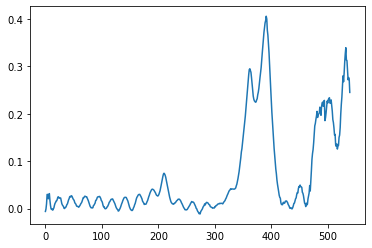

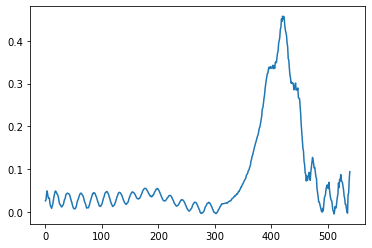

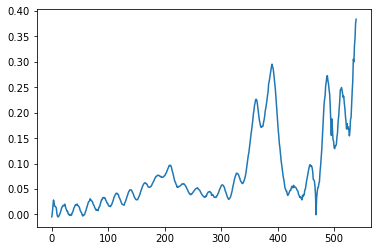

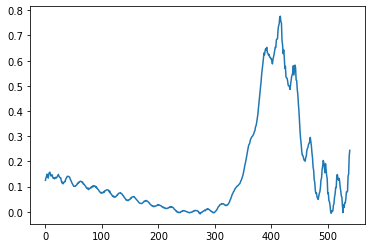

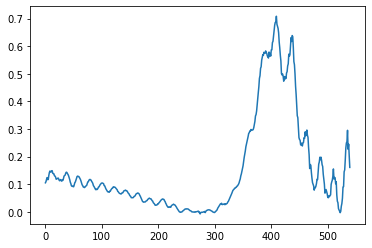

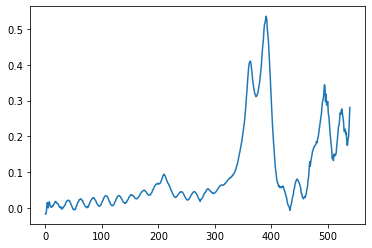

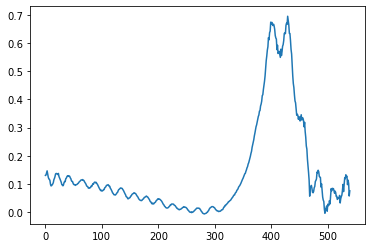

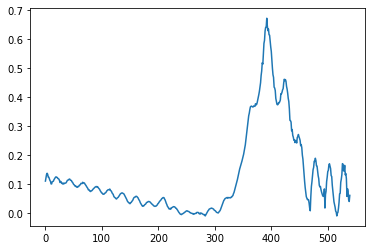

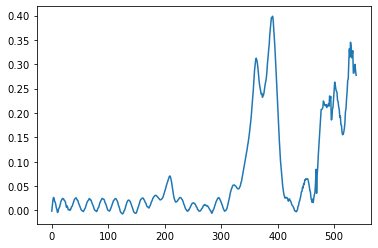

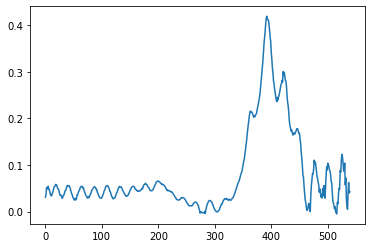

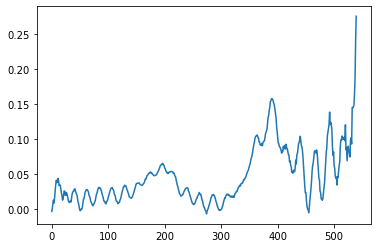

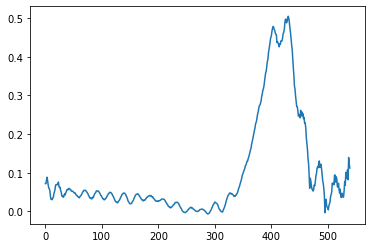

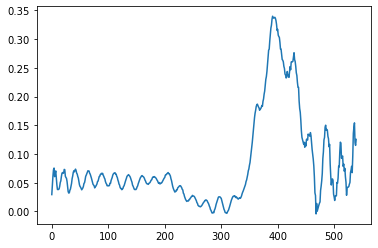

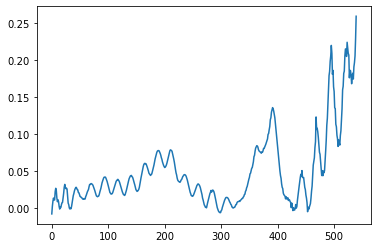

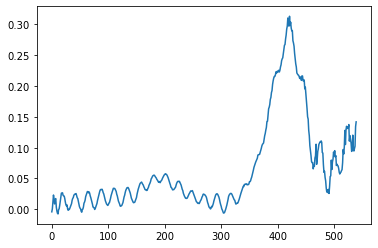

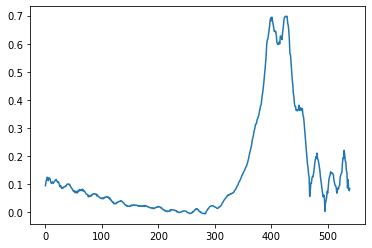

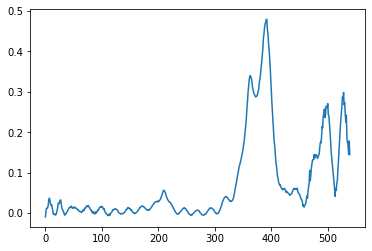

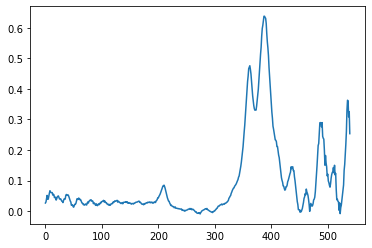

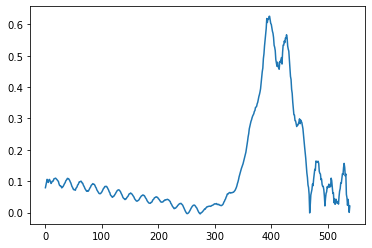

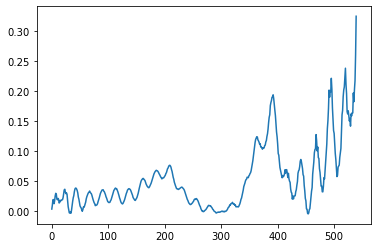

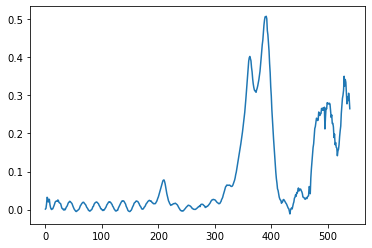

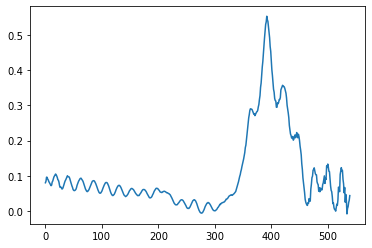

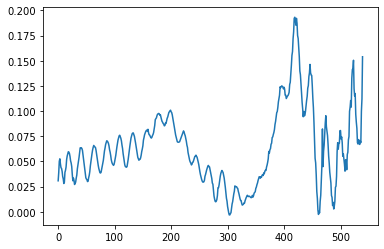

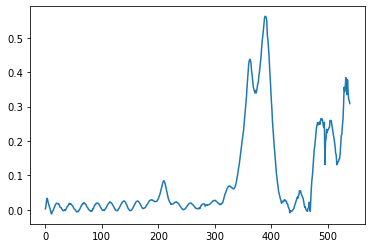

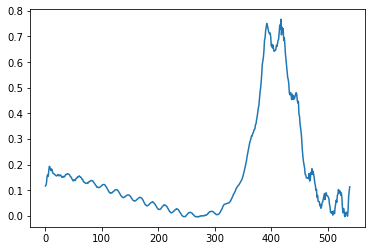

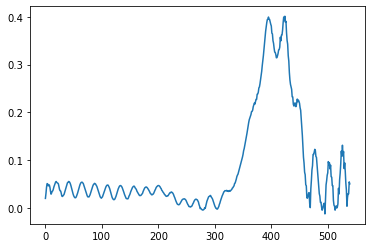

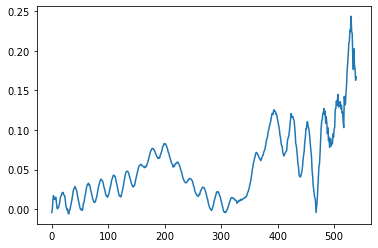

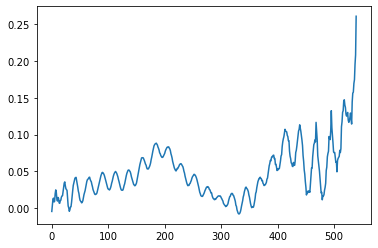

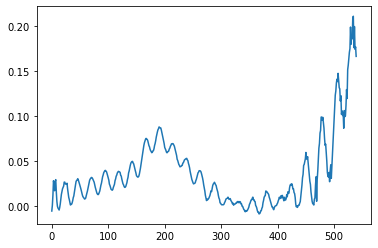

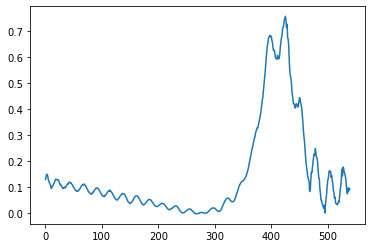

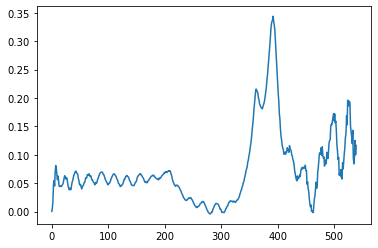

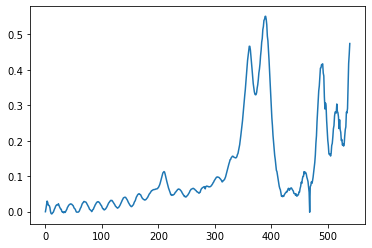

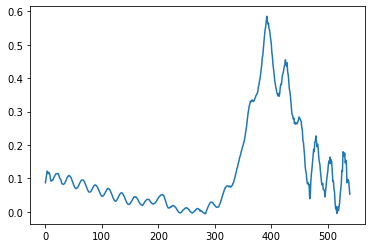

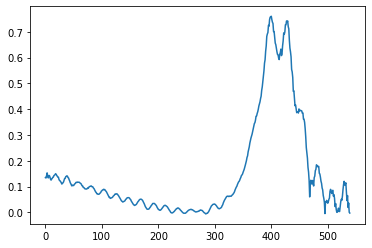

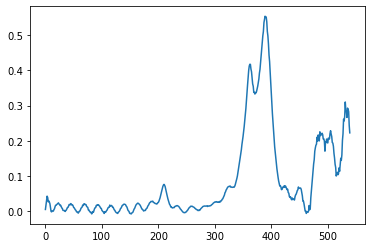

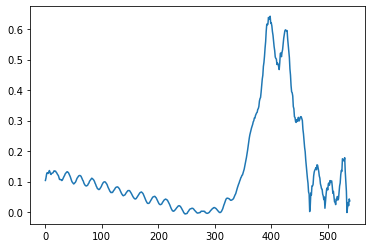

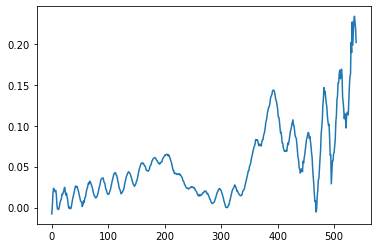

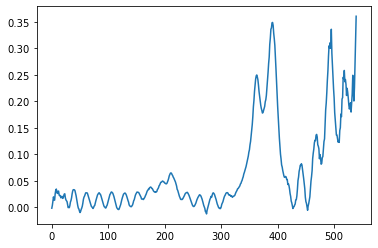

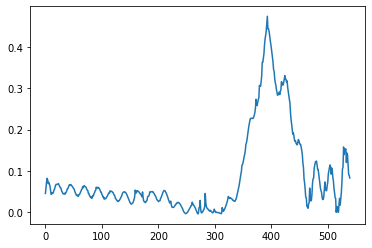

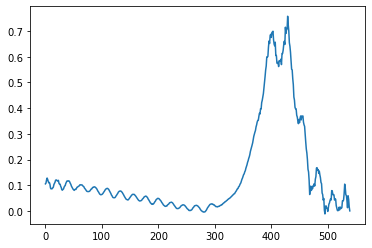

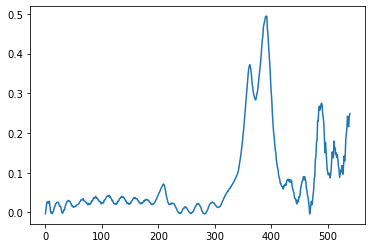

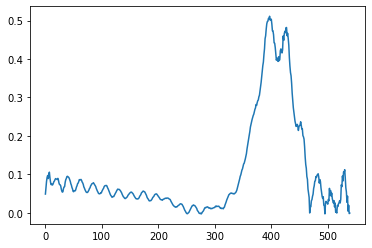

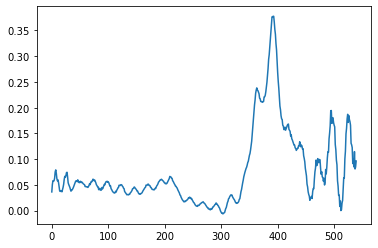

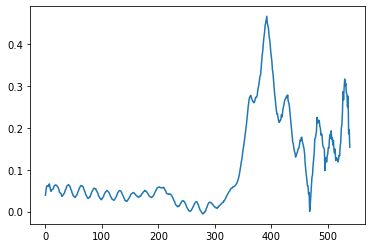

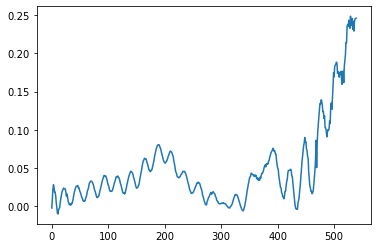

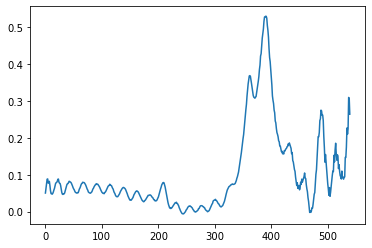

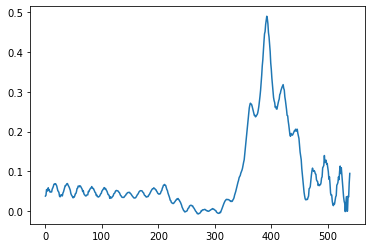

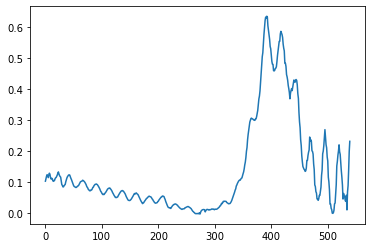

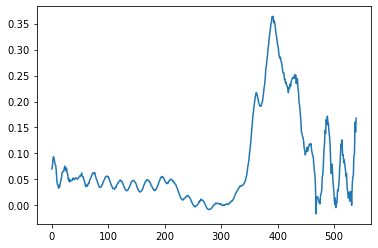

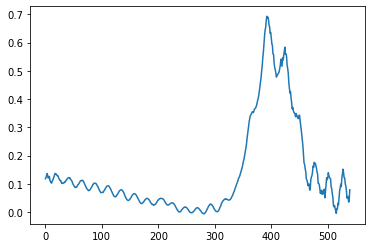

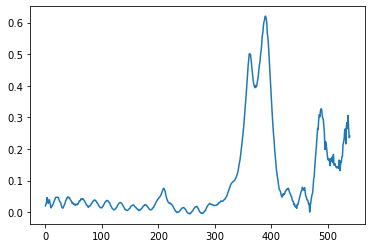

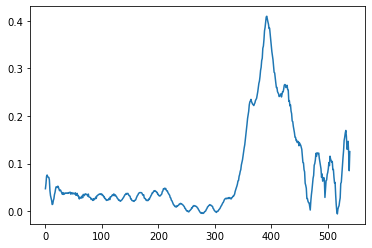

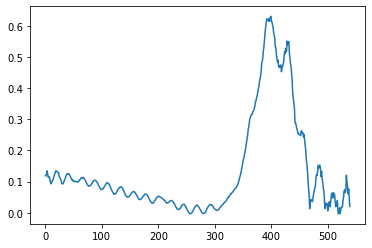

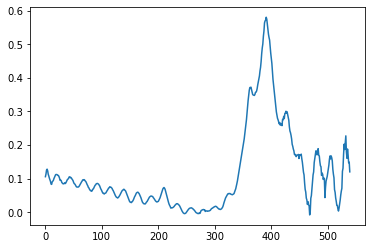

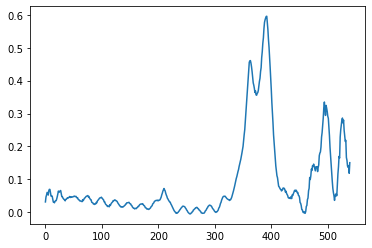

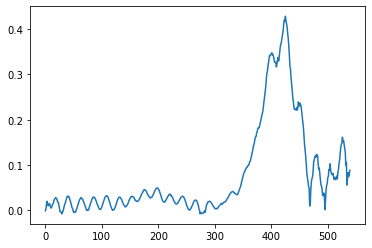

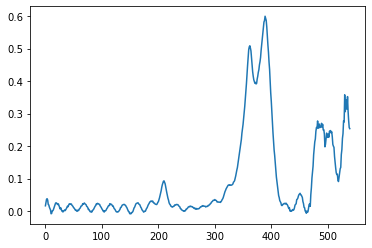

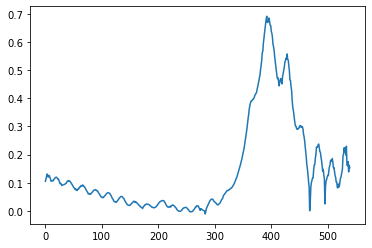

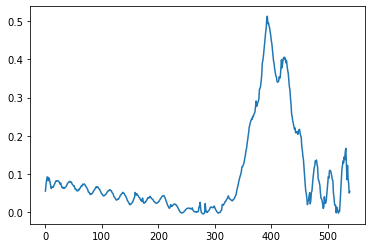

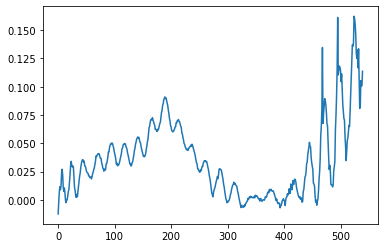

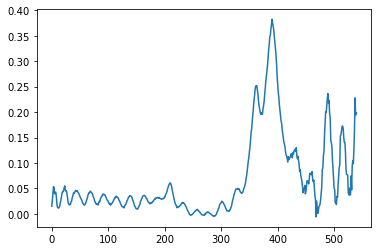

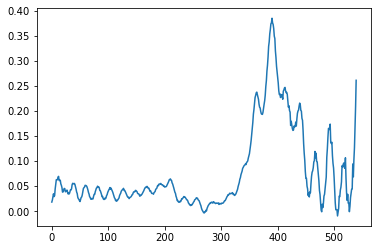

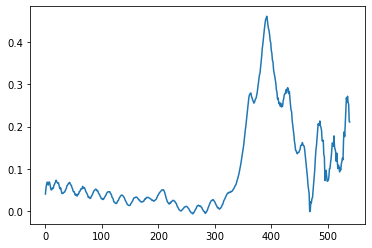

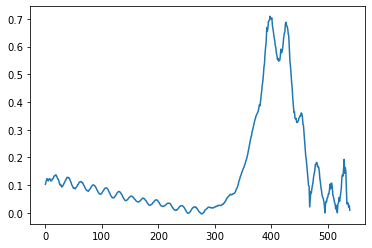

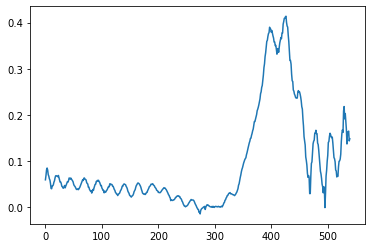

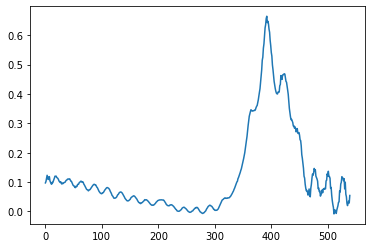

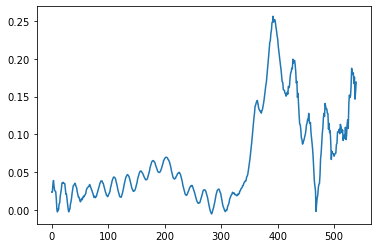

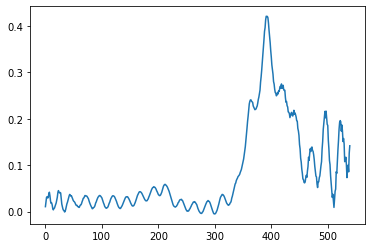

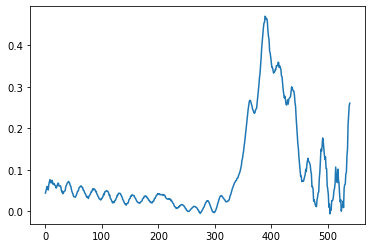

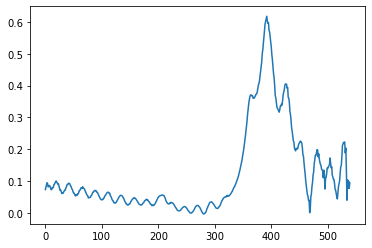

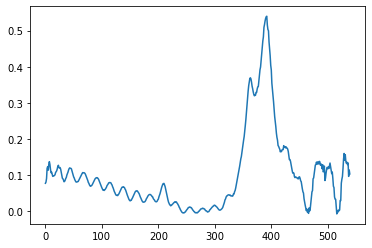

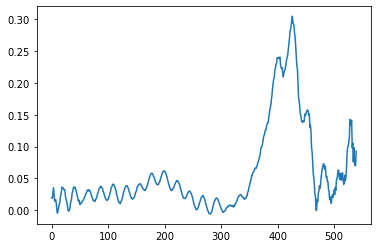

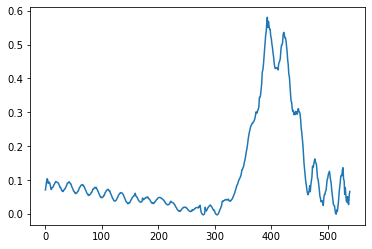

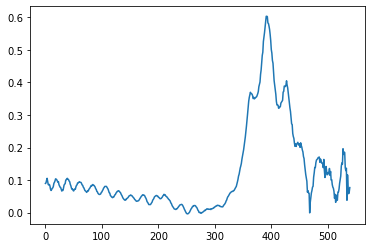

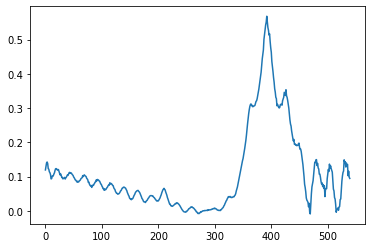

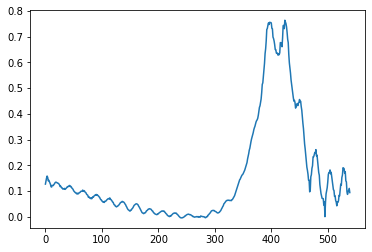

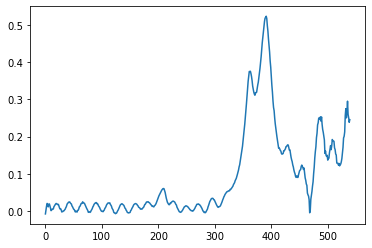

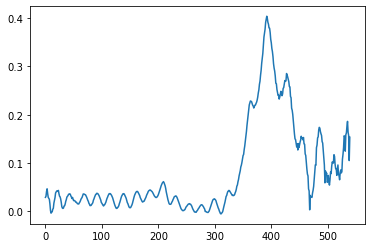

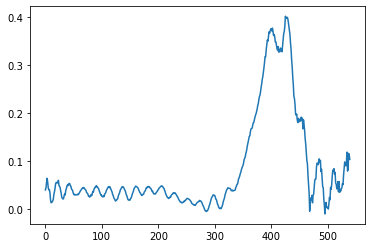

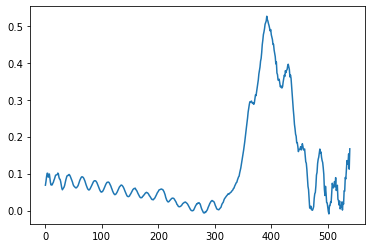

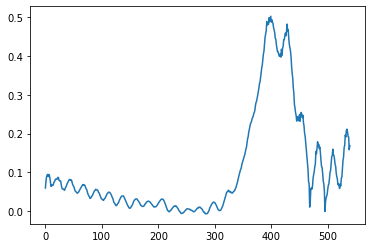

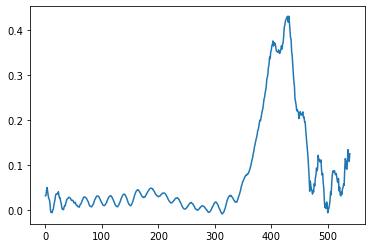

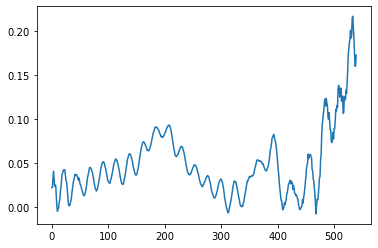

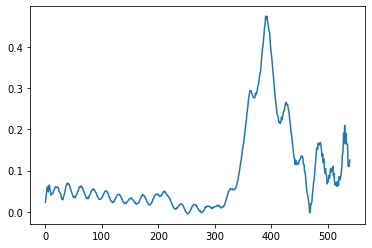

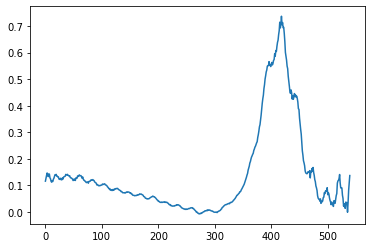

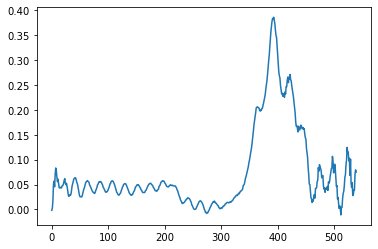

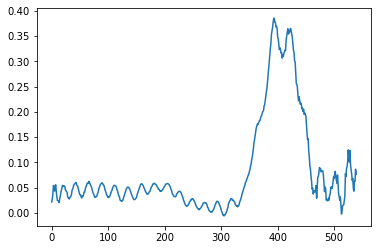

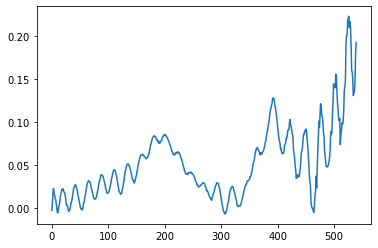

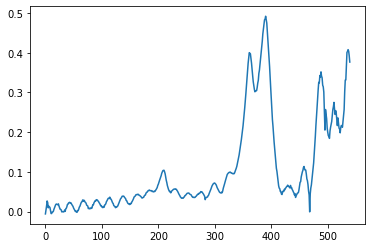

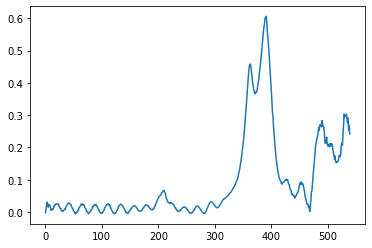

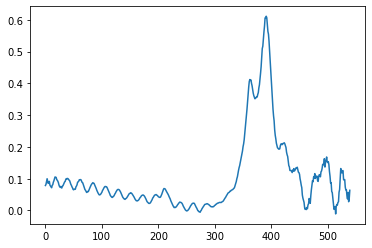

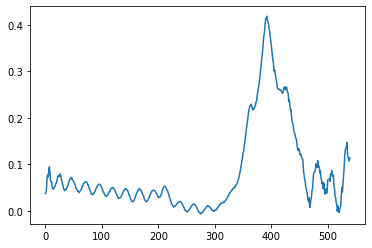

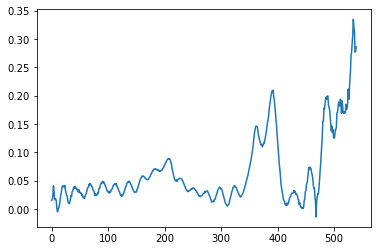

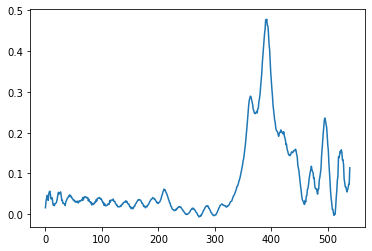

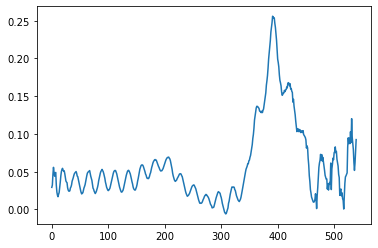

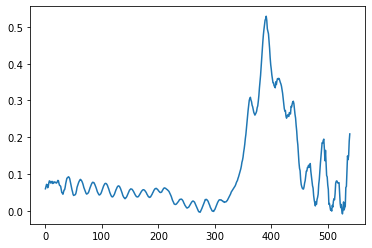

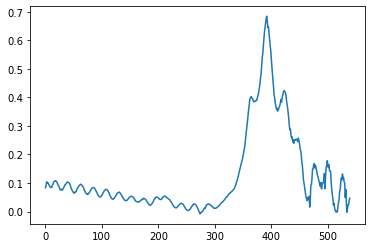

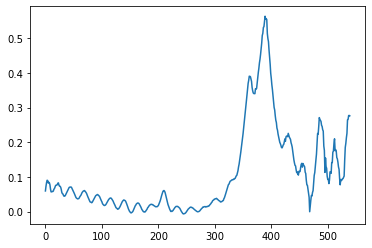

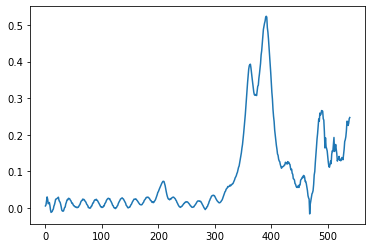

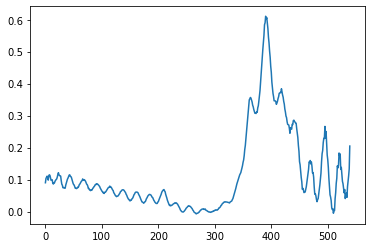

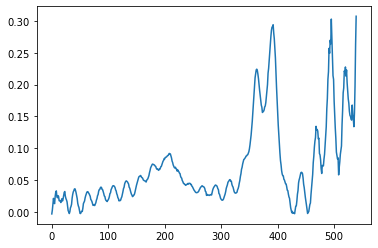

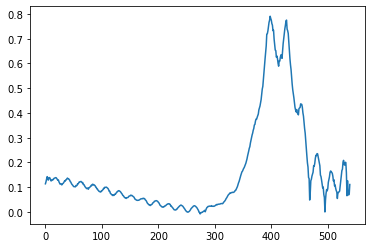

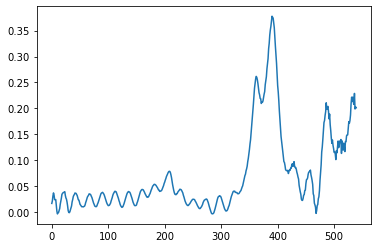

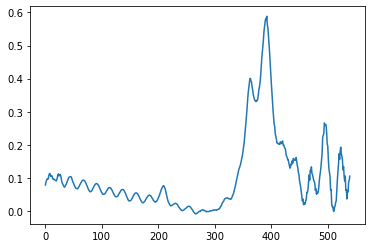

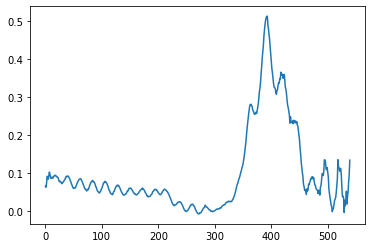

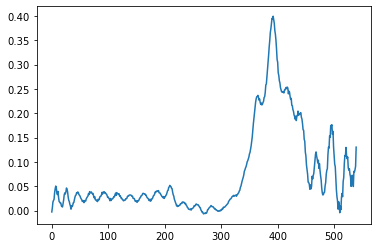

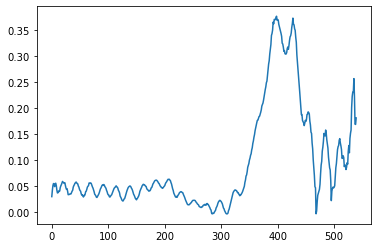

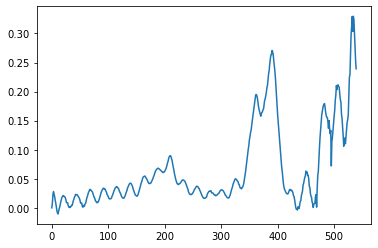

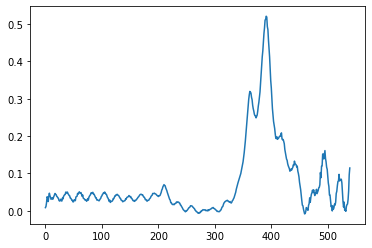

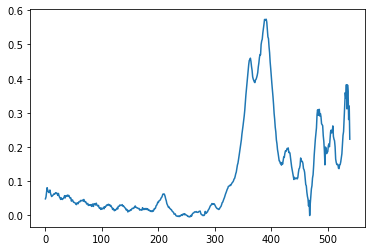

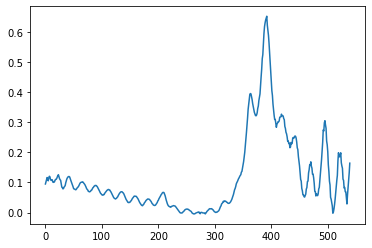

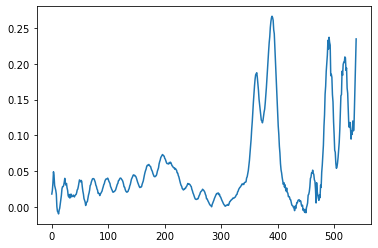

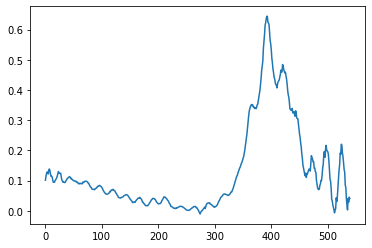

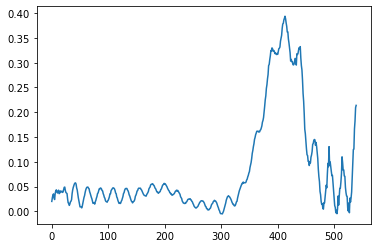

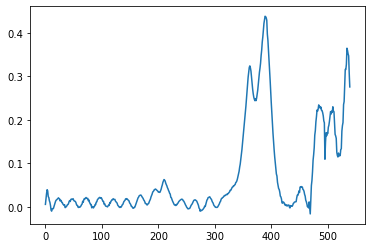

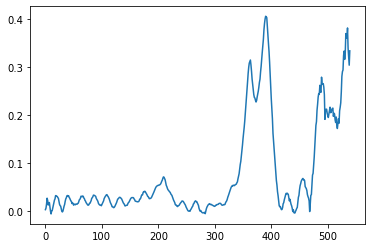

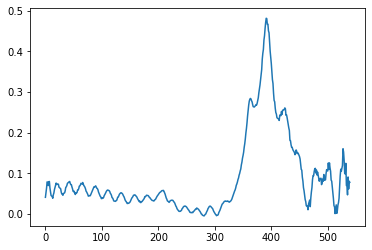

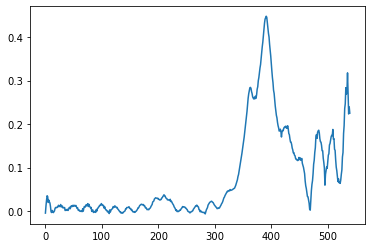

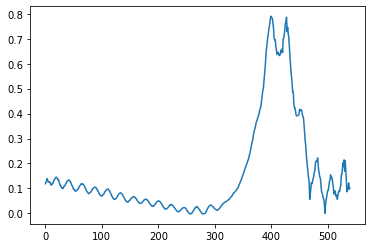

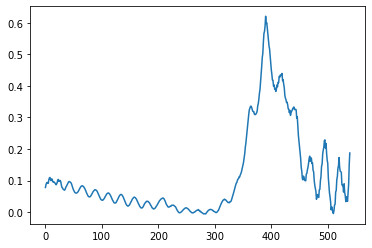

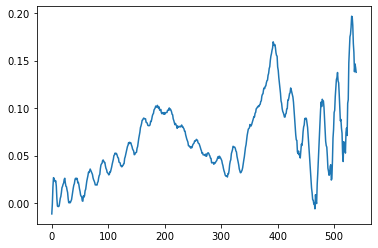

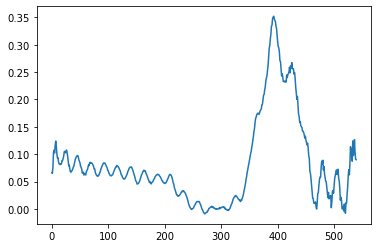

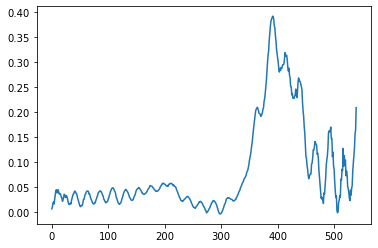

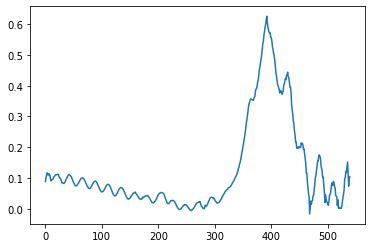

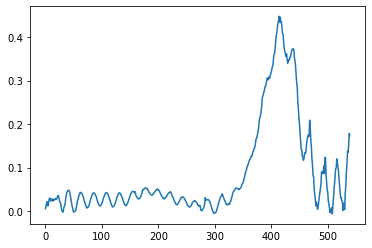

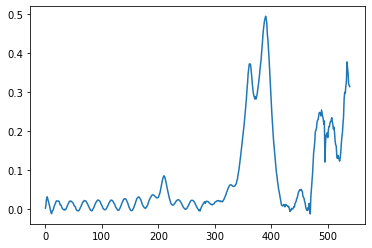

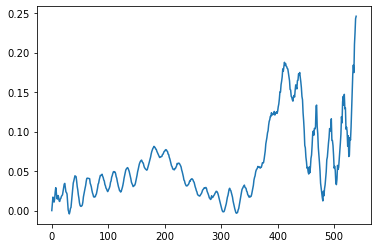

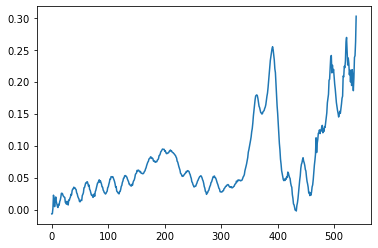

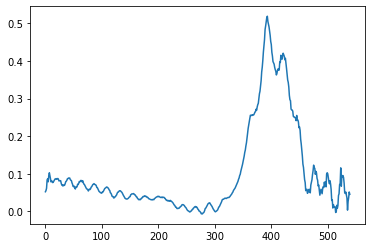

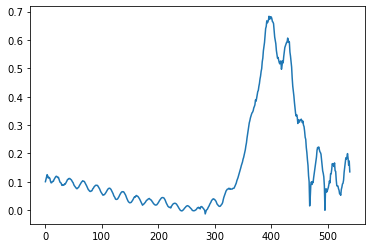

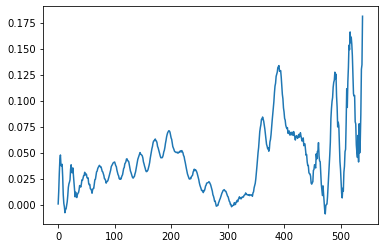

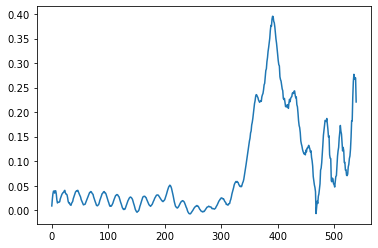

In [54]:
for i in range(0,400,1):
    plt.plot(X[i])
    plt.show()

### Train data

In [4]:
import sklearn 
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from numpy import mean,std,arange
from sklearn.model_selection import cross_val_score,train_test_split,cross_validate,cross_val_predict

### doing cross validation & hyperparameter

In [ ]:
Alphas_range = np.arange(0,1.01,0.01)
tol_range = np.arange(0,1,0.001)
Ridge_model = Ridge()
#for a in Alphas_range:
params_Ridge = {'alpha': Alphas_range , "fit_intercept": [True, False],
                    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],"tol" : tol_range}
Ridge_GS = GridSearchCV(Ridge_model, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_

In [108]:
Alphas_range = np.arange(0,1.01,0.01)
print(Alphas_range)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [42]:
Alphas_range = np.arange(0,1,0.1)
for a in Alphas_range:
    Ridge_model = Ridge()
    params_Ridge = {'alpha': [Alphas_range] , "fit_intercept": [True, False], 
                "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
    Ridge_GS = RandomizedSearchCV(Ridge_model, param_distributions=params_Ridge, n_jobs=-1)
    Ridge_GS.fit(X_train,y_train)
print(Ridge_GS.best_params_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: Number of targets and number of penalties do not correspond: 99 != 3

In [6]:
print(Ridge_GS.best_estimator_.alpha)

0.12


In [19]:
df_Xtrain = pd.DataFrame(X_train)
df_ytrain = pd.DataFrame(y_train)

In [7]:
Alphas_range = np.arange(0,1.01,0.01)
fit_intercept = [True, False]
solver = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
score_collection = []
for n in Alphas_range:
    for w in fit_intercept:
        for a in solver:
            Ridge_reg = Ridge(alpha=n,fit_intercept=w,solver=a)
            scores = cross_val_score(Ridge_reg, X_train, y_train, cv=10)
            score_collection.append(scores)
            
print(score_collection)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.94398e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.26127e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.87083e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.31382e-18): r

[array([0.91823853, 0.9339184 , 0.93968668, 0.89837103, 0.94870294,
       0.9391125 , 0.86419824, 0.94579098, 0.93329989, 0.92935738]), array([0.91795989, 0.93338103, 0.93863595, 0.89816501, 0.94862432,
       0.93922673, 0.86017968, 0.94518559, 0.93385361, 0.93011963]), array([0.96610711, 0.96989172, 0.97575263, 0.95517536, 0.97912747,
       0.97065899, 0.94776933, 0.97676676, 0.97652547, 0.98443297]), array([0.91779752, 0.93332623, 0.93847635, 0.89796181, 0.94859503,
       0.93899474, 0.8600741 , 0.94525683, 0.93368454, 0.92984975]), array([0.98116811, 0.97960348, 0.98229618, 0.96689853, 0.9846762 ,
       0.98220358, 0.96700695, 0.98558618, 0.98421291, 0.99082952]), array([0.98313099, 0.97894061, 0.9826637 , 0.96863652, 0.98435252,
       0.98370232, 0.9673197 , 0.9860772 , 0.98487455, 0.99154322]), array([0.88720433, 0.90672555, 0.89306089, 0.86299889, 0.93760103,
       0.91508952, 0.80999192, 0.93218448, 0.89981941, 0.88992285]), array([0.88720433, 0.90672555, 0.89306089, 0.86

In [21]:
Ridgeregression = Ridge(random_state=3, **Ridge_GS.best_params_)
all_accuracies = -cross_val_score(estimator=Ridgeregression,X=X_train,y= y_train, cv=10,scoring='neg_mean_squared_error')
all_accuracies

array([0.00098125, 0.00167873, 0.00089689, 0.00176039, 0.0013429 ,
       0.00103511, 0.00168812, 0.00084989, 0.0009544 , 0.00076676])

In [52]:
print("Mean : ",all_accuracies.mean())
print("STD : ",all_accuracies.std())

Mean :  0.9828602421694669
STD :  0.003075124046246683


In [9]:
Ridgeregression.fit(X_train,y_train)
Ridgeregression.score(X_test,y_test)

0.9886816794774734

## Method 2

In [72]:
alphas = np.arange(0,1.01,0.01)
val_errors = []
for alpha in alphas:
    Rides = Ridge(alpha=alpha, fit_intercept=True)
    errors = np.sum(-cross_val_score(Rides, 
                                     X_train, 
                                     y_train, 
                                     scoring='neg_mean_squared_error', 
                                     cv=10, 
                                     n_jobs=-1))
    val_errors.append(np.sqrt(errors))

In [73]:
print(val_errors)

[0.2253031728164595, 0.1163683539620712, 0.11281714034281433, 0.11138543965328071, 0.11061607457720385, 0.1101436820255165, 0.10983123887780748, 0.1096152478931776, 0.10946202406027011, 0.10935192733579963, 0.10927268301313313, 0.109216203132872, 0.10917693359132018, 0.10915093224845204, 0.10913532478853795, 0.10912796823441222, 0.10912723463188988, 0.10913186735661702, 0.1091408829592255, 0.10915350248635311, 0.1091691024128991, 0.10918717893948736, 0.10920732159290857, 0.10922919342418014, 0.10925251596414422, 0.10927705766127391, 0.10930262490266376, 0.10932905497474768, 0.1093562104967278, 0.10938397498351492, 0.10941224928301237, 0.10944094869601798, 0.10947000063328483, 0.10949934269838721, 0.10952892111041201, 0.1095586893996009, 0.10958860732352611, 0.10961863996244559, 0.10964875696100793, 0.10967893189007594, 0.10970914170760714, 0.10973936630157968, 0.10976958810115581, 0.10979979174482951, 0.10982996379633606, 0.1098600925007361, 0.10989016757441433, 0.10992018002379379, 0.

In [74]:
print('best alpha: {}'.format(alphas[np.argmin(val_errors)]))

best alpha: 0.16


In [54]:
alpha_range = np.arange(0.01,1,0.5)
a_score = []
for a in alpha_range:
    Ridge_model = Ridge()
    score = cross_val_score(Ridge_model,X_train,y_train,cv=5)
    a_score.append(score.mean())

In [55]:
a_score

[0.9820075577627506, 0.9820075577627506]

In [5]:
model = Ridge(alpha=0.16)

In [6]:
model.fit(X_train,y_train)

Ridge(alpha=0.16)

### ================================================

In [9]:
model.coef_

array([[-0.05576662, -0.03653497, -0.05396388, ..., -0.10772551,
        -0.00675885,  0.03950721],
       [ 0.00315599,  0.0010063 ,  0.0125175 , ...,  0.06639719,
         0.03304436, -0.09395803],
       [ 0.05261064,  0.03552868,  0.04144639, ...,  0.04132832,
        -0.02628551,  0.05445082]])

In [10]:
model.intercept_

array([0.80151331, 0.11202993, 0.08645676])

In [11]:
model.score(X_train,y_train)

0.9895288903679434

In [12]:
model.score(X_test,y_test)

0.9886939159849587

In [7]:
y_pred2=model.predict(X_test)
y_pred2

array([[ 2.16678175e-02,  2.74282144e-01,  7.04050039e-01],
       [ 3.18308591e-02,  5.60978805e-01,  4.07190336e-01],
       [ 2.87092370e-02,  8.67041499e-01,  1.04249264e-01],
       [ 5.79862277e-01, -1.05975172e-02,  4.30735240e-01],
       [ 3.52251954e-02,  9.58006587e-01,  6.76821777e-03],
       [-6.58023024e-02,  3.93311135e-01,  6.72491168e-01],
       [ 2.29302925e-01,  2.64086737e-01,  5.06610338e-01],
       [ 9.40071055e-01,  4.30636622e-02,  1.68652830e-02],
       [ 3.53036562e-01,  4.61912407e-01,  1.85051031e-01],
       [ 3.80794081e-01,  3.29158549e-01,  2.90047370e-01],
       [ 2.59095132e-01,  3.96254950e-01,  3.44649919e-01],
       [ 7.71009524e-02,  1.23671324e-01,  7.99227724e-01],
       [ 4.42291610e-01,  7.92868042e-02,  4.78421585e-01],
       [ 3.29302149e-03,  3.84552986e-01,  6.12153993e-01],
       [ 6.03064527e-01,  1.99481371e-01,  1.97454102e-01],
       [ 3.58077653e-01,  3.33372638e-01,  3.08549709e-01],
       [ 2.11678543e-01,  3.48024602e-01

In [64]:
y_pred1=Ridgeregression.predict(X_test)
y_pred1

array([[ 2.11411412e-02,  2.74174583e-01,  7.04588094e-01],
       [ 3.27945526e-02,  5.62336000e-01,  4.06325737e-01],
       [ 2.80977742e-02,  8.67391962e-01,  1.04111562e-01],
       [ 5.81556978e-01, -1.27810240e-02,  4.30473864e-01],
       [ 3.89523581e-02,  9.56704580e-01,  4.68765582e-03],
       [-6.28528472e-02,  3.91927394e-01,  6.71023694e-01],
       [ 2.27019659e-01,  2.65134531e-01,  5.08245408e-01],
       [ 9.40166151e-01,  4.51746644e-02,  1.48788611e-02],
       [ 3.51283858e-01,  4.64123776e-01,  1.86253931e-01],
       [ 3.84255879e-01,  3.26266241e-01,  2.87381485e-01],
       [ 2.59709191e-01,  3.96569466e-01,  3.43771503e-01],
       [ 7.70990187e-02,  1.24264849e-01,  7.97449388e-01],
       [ 4.42317245e-01,  8.04427632e-02,  4.78982704e-01],
       [ 8.45415003e-04,  3.83637243e-01,  6.14908621e-01],
       [ 6.00936005e-01,  2.00574364e-01,  1.98691040e-01],
       [ 3.57050506e-01,  3.33346905e-01,  3.09919464e-01],
       [ 2.10012258e-01,  3.47760927e-01

In [13]:
print(y_test.shape)
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)

(80, 3)
(80, 540)
(320, 540)
(320, 3)


In [16]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score", r2_score(y_test,y_pred2))
print("MSE",mean_squared_error(y_test,y_pred2))

R2 score 0.9887259362313879
MSE 0.0006450986759679441


In [71]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score", r2_score(y_test,y_pred2))
print("MSE",mean_squared_error(y_test,y_pred2))

R2 score 0.9887532979849164
MSE 0.0006436107307733635


In [105]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score", r2_score(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))

R2 score 0.9886939159849587
MSE 0.0006468915967855803


In [6]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.reshape(-1))

(80, 540)
(80, 3)
(320, 540)
(320, 3)
[0.         0.30023952 0.69976048 0.         0.59972455 0.40027546
 0.         0.89991263 0.10008737 0.60053142 0.         0.39946858
 0.05060899 0.8994473  0.04994371 0.         0.39972262 0.60027739
 0.24946934 0.25026231 0.50026835 1.         0.         0.
 0.31033173 0.50012997 0.1895383  0.36151035 0.33033492 0.30815473
 0.28908168 0.38053515 0.33038317 0.09925605 0.09997913 0.80076482
 0.45010675 0.10044577 0.44944749 0.         0.39972262 0.60027739
 0.60006917 0.19968279 0.20024804 0.39980263 0.29951013 0.30068725
 0.29968425 0.3005093  0.39980645 0.10050836 0.44952809 0.44996355
 0.06008469 0.65929652 0.28061879 0.70026441 0.         0.29973559
 0.19971208 0.20048072 0.5998072  0.10050836 0.44952809 0.44996355
 0.10050836 0.44952809 0.44996355 0.         0.1000461  0.8999539
 0.19966945 0.59999081 0.20033973 0.39980263 0.29951013 0.30068725
 0.45010675 0.10044577 0.44944749 0.04065785 0.40012313 0.55921902
 0.25962749 0.17983643 0.56053608

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)
print(X.shape)
print(y.shape)

(320, 540)
(320, 3)


In [12]:
import pandas as pd
df = pd.DataFrame(y_test,
                 columns=['test1', 'test2','test3'])
df

test1     test2     test3
0   0.000000  0.300240  0.699760
1   0.000000  0.599725  0.400275
2   0.000000  0.899913  0.100087
3   0.600531  0.000000  0.399469
4   0.050609  0.899447  0.049944
..       ...       ...       ...
75  0.700090  0.299910  0.000000
76  0.249469  0.250262  0.500268
77  0.000000  0.300240  0.699760
78  0.759248  0.150333  0.090419
79  0.349467  0.360306  0.290227

[80 rows x 3 columns]

In [15]:
df1 = pd.DataFrame(y_pred1,
                 columns=['predict1', 'predict2','predict3'])
df1

predict1  predict2  predict3
0   0.023452  0.271871  0.704678
1   0.031522  0.561363  0.407115
2   0.026818  0.868890  0.104293
3   0.582185 -0.012089  0.429904
4   0.037630  0.957167  0.005203
..       ...       ...       ...
75  0.700414  0.306361 -0.006775
76  0.226593  0.267019  0.506388
77 -0.018695  0.261197  0.757498
78  0.738037  0.170724  0.091240
79  0.344176  0.356447  0.299377

[80 rows x 3 columns]

In [16]:
dc = pd.concat([df,df1],axis='columns')
dc

test1     test2     test3  predict1  predict2  predict3
0   0.000000  0.300240  0.699760  0.023452  0.271871  0.704678
1   0.000000  0.599725  0.400275  0.031522  0.561363  0.407115
2   0.000000  0.899913  0.100087  0.026818  0.868890  0.104293
3   0.600531  0.000000  0.399469  0.582185 -0.012089  0.429904
4   0.050609  0.899447  0.049944  0.037630  0.957167  0.005203
..       ...       ...       ...       ...       ...       ...
75  0.700090  0.299910  0.000000  0.700414  0.306361 -0.006775
76  0.249469  0.250262  0.500268  0.226593  0.267019  0.506388
77  0.000000  0.300240  0.699760 -0.018695  0.261197  0.757498
78  0.759248  0.150333  0.090419  0.738037  0.170724  0.091240
79  0.349467  0.360306  0.290227  0.344176  0.356447  0.299377

[80 rows x 6 columns]

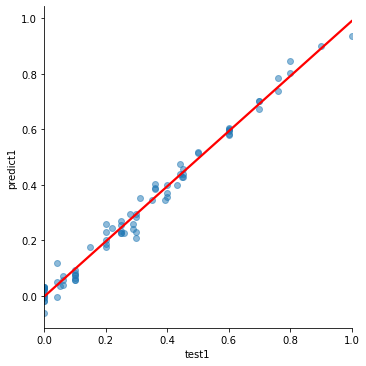

In [18]:
sns.lmplot(x='test1', y='predict1', data=dc, ci=True,
          scatter_kws={'alpha' : 0.5},
          line_kws={'color': 'red'});

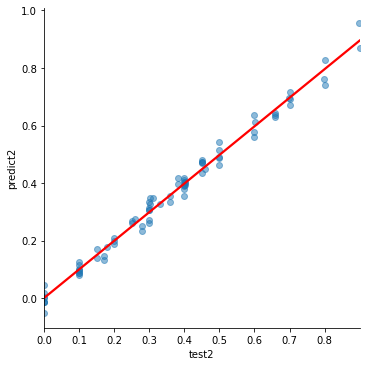

In [19]:
sns.lmplot(x='test2', y='predict2', data=dc, ci=None,
          scatter_kws={'alpha' : 0.5},
          line_kws={'color': 'red'});

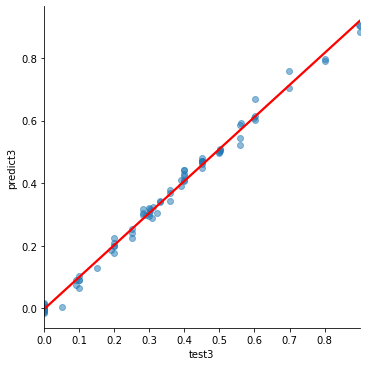

In [20]:
sns.lmplot(x='test3', y='predict3', data=dc, ci=True,
          scatter_kws={'alpha' : 0.5},
          line_kws={'color': 'red'});

### Test data

In [39]:
import sklearn 
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=0.5)

In [40]:
model2.fit(X_test,y_test)

Ridge(alpha=0.5)

In [41]:
y_pred2=model2.predict(X_test)
y_pred2

array([[ 0.02581411,  0.28072624,  0.69345965],
       [ 0.04263706,  0.56396894,  0.393394  ],
       [ 0.05172773,  0.84308024,  0.10519203],
       [ 0.58334472, -0.01261533,  0.42927061],
       [ 0.03167187,  0.94496592,  0.02336221],
       [-0.05261289,  0.40963495,  0.64297793],
       [ 0.24057504,  0.26952683,  0.48989813],
       [ 0.94979339,  0.04110473,  0.00910188],
       [ 0.36524006,  0.46333446,  0.17142548],
       [ 0.37417401,  0.34192432,  0.28390166],
       [ 0.26554777,  0.39715667,  0.33729556],
       [ 0.07696869,  0.12771499,  0.79531632],
       [ 0.45840819,  0.08638561,  0.45520619],
       [ 0.02092088,  0.39461028,  0.58446884],
       [ 0.61362459,  0.18483739,  0.20153802],
       [ 0.37921381,  0.31522471,  0.30556148],
       [ 0.23521777,  0.35094375,  0.41383848],
       [ 0.06957095,  0.46971347,  0.46071559],
       [ 0.07700999,  0.63908245,  0.28390756],
       [ 0.69323585, -0.00268414,  0.30944829],
       [ 0.20364644,  0.1922018 ,  0.604

In [42]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score", r2_score(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))

R2 score 0.9900366047793895
MSE 0.0005744754449214918


### TEST Logistic

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_fornat = 'retina'

In [5]:
dataset = np.load("baseline_removed_dataset.npz")
X_train = dataset['X_train']
X_test = dataset['X_test']
y_train = dataset['y_train']
y_test = dataset['y_test']
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 540)
(80, 540)
(320, 3)
(80, 3)


In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)
print(X.shape)
print(y.shape)

(320, 540)
(320, 3)


In [6]:
regressor = MultiOutputRegressor(SVR(kernel='rbf',C=1, epsilon=1))
regressor.fit(X_train,y_train)

MultiOutputRegressor(estimator=SVR(C=1, epsilon=1))

In [115]:
y_pred2=regressor.predict(X_test)
y_pred2

array([[-1.24731383e-01,  1.50936436e-01,  2.88984233e-01],
       [-1.15037723e-01,  2.22092539e-01,  2.23732435e-01],
       [-1.12599340e-01,  3.03122027e-01,  1.55552793e-01],
       [-4.70314194e-02,  1.43364233e-01,  2.02250528e-01],
       [-1.14210771e-01,  3.35390853e-01,  1.35749571e-01],
       [-1.45542091e-01,  1.92979090e-01,  2.82537924e-01],
       [-8.84500855e-02,  1.67726088e-01,  2.31160382e-01],
       [ 3.16105561e-02,  1.70947537e-01,  1.12331854e-01],
       [-6.56494220e-02,  2.30927507e-01,  1.57269543e-01],
       [-6.86957848e-02,  1.99235304e-01,  1.80948540e-01],
       [-9.01563376e-02,  2.12760422e-01,  1.99545293e-01],
       [-1.25920015e-01,  1.30295956e-01,  3.10374686e-01],
       [-6.39987465e-02,  1.53263650e-01,  2.18023919e-01],
       [-1.24747345e-01,  1.79370356e-01,  2.64087566e-01],
       [-3.04755704e-02,  1.85219548e-01,  1.57596477e-01],
       [-7.00114202e-02,  2.01956364e-01,  1.80790110e-01],
       [-9.24644087e-02,  1.89733397e-01

In [116]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score", r2_score(y_test,y_pred2))
print("MSE",mean_squared_error(y_test,y_pred2))

R2 score -0.6987098942348213
MSE 0.10012407891825931
